# Initial Schedule 

Friday, 02.10.2020 (set up and get basic understanding)

- [x] set up the working environment (github, notebook etc.)
- [x] agree on working process and schedule
- [x] read into the topic, achieve basic understanding
- [x] do research, get deeper knowledge 
- [x] have a look into the data, basically understand the dataset
- [x] start the cleaning process

Monday, 05.10.2020 (Finish the data exploration and find hypotheses)
- [x] finish cleaning
- [x] explore data by visualization, draw plots
- [ ] phrase questions & hypothesis to work on
- [ ] write down questions for review with coaches
- [ ] review with coaches at 2.20 - 2.40 pm
- [ ] gather most import information


Tuesday, 06.10.2020 (Predicition Modeling)
- [ ] create prediction models (at least 3) with optimal parameters
- [ ] create new features

Wednesday, 07.10.2020 (Summing up the results, preparing deliverables)
- [ ] beautify plots
- [ ] create final visualization

Thursay, 08.10.2020 - emergency buffer



## Deliverables 

Deadline: 08.10.2020, 11:00
- [ ] slides presentation (for non technical stake holders)
- [ ] PEP8 jupyternotebook on github

## Things to remember 

- Data Science Life Cycle

## Notes 

- age, gender, education, country, ethnicity: transform age to absolute values classes
- is there a correlation between the usage of 'soft drugs' to 'hard drugs' (soft: choc, caff, alc, cigarettes)
- in case one is using at least one drug, is it more likely that he'll use other drugs as well
- create a feature the stats if someone is probably addicted 



- create new features:
    - uses soft drug (without alcohol)  = 1 / 0    
- create label:
    - uses hard drug = 1 / 0
    
- prediction modeling:
    - baseline model without additional features

## Main question / hypothesis 

- we try to predict if one will get a user of hard drugs or if he would even try
- discuss how to consider ethnicity for calcutation?

## Review session with coaches

- when to use dummies / separation of categorial to conitnous values

- 

# Loading the data 

Clear namespace:

In [2]:
reset -fs

## Import modules and packages 

In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from numpy import mean
from numpy import std

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer
from time import time

from pprint import pprint

from IPython.display import display_html
from IPython.display import display
from IPython.display import Image

# set ip magic command
%matplotlib inline

# set viz style
sns.set_theme(style="ticks")

## Load dataframe 

In [4]:
# load the dataframe
data = pd.read_excel('data/drug_consumption.xls')

In [5]:
# check data structure
data.shape

(1885, 32)

**Dataset Informations:** 
- Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. 
- All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
- Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"

In [6]:
# get first overview over the content
data.head().T

0        1        2        3        4
ID               1        2        3        4        5
Age        0.49788 -0.07854  0.49788 -0.95197  0.49788
Gender     0.48246 -0.48246 -0.48246  0.48246  0.48246
Education -0.05921  1.98437 -0.05921  1.16365  1.98437
Country    0.96082  0.96082  0.96082  0.96082  0.96082
Ethnicity    0.126 -0.31685 -0.31685 -0.31685 -0.31685
Nscore     0.31287 -0.67825 -0.46725 -0.14882  0.73545
Escore    -0.57545  1.93886  0.80523 -0.80615  -1.6334
Oscore    -0.58331  1.43533 -0.84732 -0.01928 -0.45174
Ascore    -0.91699  0.76096  -1.6209  0.59042 -0.30172
Cscore    -0.00665 -0.14277  -1.0145  0.58489  1.30612
Impulsive -0.21712 -0.71126 -1.37983 -1.37983 -0.21712
SS        -1.18084 -0.21575  0.40148 -1.18084 -0.21575
Alcohol        CL5      CL5      CL6      CL4      CL4
Amphet         CL2      CL2      CL0      CL0      CL1
Amyl           CL0      CL2      CL0      CL0      CL1
Benzos         CL2      CL0      CL0      CL3      CL0
Caff           CL6      CL6      CL6      CL5      CL6
Cannabis       CL0      CL4      CL3      CL2      CL3
Choc           CL5      CL6      CL4      CL4      CL6
Coke           CL0      CL3      CL0      CL2      CL0
Crack          CL0      CL0      CL0      CL0      CL0
Ecstasy        CL0      CL4      CL0      CL0      CL1
Heroin         CL0      CL0      CL0      CL0      CL0
Ketamine       CL0      CL2      CL0      CL2      CL0
Legalh         CL0      CL0      CL0      CL0      CL1
LSD            CL0      CL2      CL0      CL0      CL0
Meth           CL0      CL3      CL0      CL0      CL0
Shrooms        CL0      CL0      CL1      CL0      CL2
Nicotine       CL2      CL4      CL0      CL2      CL2
Semer          CL0      CL0      CL0      CL0      CL0
VSA            CL0      CL0      CL0      CL0      CL0

In [7]:
# investigate column names
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

The columns names and data description indicates that the features of the dataset are primarely grouped into three categories. For a further usage we name these three categories and assign the mathing columns to them:

In [8]:
general = data.columns[1:6]
psychometrics = data.columns[6:13]
drugs = data.columns[13:]
print(f'Each row of the dataset is indexed with an ID '
      f'and holds information about {len(general)} general '
      f'and {len(psychometrics)} psychometric features, '
      f'as well as about the usage frequency of {len(drugs)} drugs.'
     )

Each row of the dataset is indexed with an ID and holds information about 5 general and 7 psychometric features, as well as about the usage frequency of 19 drugs.


# Data Cleaning 

## Check for missing values 

In [9]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

No missing values to deal with.

## Check for duplicates

In [10]:
# There is only the id column where duplicates could be of interest:

data.ID.duplicated().sum()

0

No ID duplicates to handle.

## Check for datatype consistency 

In [11]:
data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

The dataset is indexed by a numerical ID. The drug-usage columns hold categorical values, while all other attributes were initially transformed to numerical distribution values. Therefore the type checking showed no anomalies to deal with.

## Value Transformation

As it's impossible to understand the meaning of the numerical transformation of the general data, we decided to translate to create an additional dataframe, holding the translations to the numerical values:

### Create new dataframe 

In [12]:
df = data.copy()

### Transform general data 

In [13]:
# change float value to str for dict accessing
df.Age = df.Age.astype(str)

# create dict from description data
age_dict = {
            '-0.95197' : '18-24',
            '-0.07854' : '25-34',
            '0.49788' : '35-44', 
            '1.09449' : '45-54',
            '1.82213' : '55-64',
            '2.59171' : '65+' 
            }

# replace values with dict data
df.Age = df.Age.replace(age_dict)

# check if only valid entries are left
df.Age.unique()

array(['35-44', '25-34', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [14]:
df.Gender = df.Gender.astype(str)

gender_dict = {
            '0.48246' : 'Female', 
            '-0.48246':'Male'
            }

df['Gender'] = df.Gender.replace(gender_dict)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df.Education = df.Education.astype(str)

Education_dict = {
            '-2.43591' : 'Left school before 16 years',
            '-1.7379' : 'Left school at 16 years ',
            '-1.43719' : 'Left school at 17 years' ,
            '-1.22751' : 'Left school at 18 years ',
            '-0.61113' : 'Some college or university, no certificate or degree' ,
            '-0.05921' : 'Professional certificate/ diploma' ,
            '0.45468' : 'University degree' ,
            '1.16365' : 'Masters degree' ,
            '1.98437' : 'Doctorate degree' 
            }

df.Education = df.Education.replace(Education_dict)
df.Education.unique()

array(['Professional certificate/ diploma', 'Doctorate degree',
       'Masters degree', 'Left school at 18 years ',
       'Left school at 16 years ', 'University degree',
       'Some college or university, no certificate or degree',
       'Left school before 16 years', 'Left school at 17 years'],
      dtype=object)

In [16]:
df.Country = df.Country.astype(str)

Country_dict = {
            '-0.09765' : 'Australia',
            '0.24923' : 'Canada' ,
            '-0.46841' : 'New Zealand',
            '-0.28519' : 'Other',
            '0.21128' : 'Republic of Ireland',
            '0.96082' : 'UK',
            '-0.57009' : 'USA' 
            }

df.Country = df.Country.replace(Country_dict)
df.Country.unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [17]:
df.Ethnicity = df.Ethnicity.astype(str)

Ethnicity_dict = {
            '-0.50212': 'Asian' ,
            '-1.10702' : 'Black' ,
            '1.90725' : 'Mixed-Black/Asian' ,
            '0.126' : 'Mixed-White/Asian' ,
            '-0.22166' : 'Mixed-White/Black' ,
            '0.1144' : 'Other' ,
            '-0.31685' : 'White' 
            }

df.Ethnicity = df.Ethnicity.replace(Ethnicity_dict)
df.Ethnicity.unique()

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

### Transform psychometrics

**N-score (Neuroticism)**

In [18]:
# create dict
keys = np.sort(df.Nscore.unique())
values = [x for x in range(12,61)]    #range based on dataset description 
Nscore_dict = dict(zip(keys, values))

# replace values
df.Nscore = df.Nscore.replace(Nscore_dict)

# check if only valid entries are left
df.Nscore.unique()

array([39., 29., 31., 34., 43., 24., 42., 33., 26., 56., 28., 27., 19.,
       22., 41., 49., 32., 25., 40., 51., 35., 36., 46., 44., 37., 47.,
       23., 30., 38., 18., 45., 17., 53., 50., 60., 21., 54., 59., 48.,
       20., 55., 16., 57., 52., 58., 14., 15., 13., 12.])

**E-score (Extraversion)**

In [19]:
# create dict
keys = np.sort(df.Escore.unique())
values = [16] + [x for x in range(18,57)] + [58, 59]    #range based on dataset description 
Escore_dict = dict(zip(keys, values))

# replace values
df.Escore = df.Escore.replace(Escore_dict)

# check if only valid entries are left
df.Escore.unique()

array([36., 52., 45., 34., 28., 38., 32., 55., 40., 41., 49., 29., 31.,
       39., 27., 43., 33., 16., 44., 37., 51., 42., 48., 46., 47., 35.,
       50., 30., 26., 58., 53., 54., 23., 22., 24., 19., 20., 21., 25.,
       56., 59., 18.])

**O-score (Openess to experience)**

In [20]:
# create dict
keys = np.sort(df.Oscore.unique())
values = [24, 26] + [x for x in range(28,61)]    #range based on dataset description 
Oscore_dict = dict(zip(keys, values))

# replace values
df.Oscore = df.Oscore.replace(Oscore_dict)

# check if only valid entries are left
df.Oscore.unique()

array([42., 55., 40., 46., 43., 35., 39., 36., 38., 47., 49., 34., 44.,
       45., 29., 51., 37., 54., 24., 41., 52., 48., 28., 53., 32., 33.,
       26., 31., 50., 58., 30., 56., 57., 60., 59.])

**A-score (Agreeableness)**

In [21]:
# create dict
keys = np.sort(df.Ascore.unique())
values = [12, 16, 18] + [x for x in range(23,61)]    #range based on dataset description 
Ascore_dict = dict(zip(keys, values))

# replace values
df.Ascore = df.Ascore.replace(Ascore_dict)

# check if only valid entries are left
df.Ascore.unique()

array([37., 48., 32., 47., 41., 55., 38., 30., 49., 39., 36., 45., 40.,
       53., 50., 43., 33., 46., 51., 23., 44., 29., 54., 42., 35., 34.,
       52., 31., 57., 56., 27., 25., 28., 58., 26., 59., 24., 18., 12.,
       16., 60.])

**C-score (Conscientiousness)**

In [22]:
# create dict
keys = np.sort(df.Cscore.unique())
values = [17] + [x for x in range(19,58)] + [59]    #range based on dataset description 
Cscore_dict = dict(zip(keys, values))

# replace values
df.Cscore = df.Cscore.replace(Cscore_dict)

# check if only valid entries are left
df.Cscore.unique()

array([42., 41., 34., 46., 50., 52., 48., 49., 43., 53., 38., 36., 59.,
       47., 31., 30., 33., 35., 51., 25., 37., 45., 39., 44., 27., 40.,
       29., 54., 55., 32., 56., 20., 28., 26., 22., 24., 23., 19., 17.,
       21., 57.])

**Impulsiveness and Sensation Seeking**

The corresponding values for the t-statistics of the columns Impulsiveness and Sensation Seeking are not available, therefore we couldn't transform the data. 


## Outlier handling 

As part of the distribution review it turned out, that we don't have to deal with ouutliers in this dataset.

In [23]:
df.head().T

0                 1  \
ID                                         1                 2   
Age                                    35-44             25-34   
Gender                                Female              Male   
Education  Professional certificate/ diploma  Doctorate degree   
Country                                   UK                UK   
Ethnicity                  Mixed-White/Asian             White   
Nscore                                    39                29   
Escore                                    36                52   
Oscore                                    42                55   
Ascore                                    37                48   
Cscore                                    42                41   
Impulsive                           -0.21712          -0.71126   
SS                                  -1.18084          -0.21575   
Alcohol                                  CL5               CL5   
Amphet                                   CL2               CL2   
Amyl                                     CL0               CL2   
Benzos                                   CL2               CL0   
Caff                                     CL6               CL6   
Cannabis                                 CL0               CL4   
Choc                                     CL5               CL6   
Coke                                     CL0               CL3   
Crack                                    CL0               CL0   
Ecstasy                                  CL0               CL4   
Heroin                                   CL0               CL0   
Ketamine                                 CL0               CL2   
Legalh                                   CL0               CL0   
LSD                                      CL0               CL2   
Meth                                     CL0               CL3   
Shrooms                                  CL0               CL0   
Nicotine                                 CL2               CL4   
Semer                                    CL0               CL0   
VSA                                      CL0               CL0   

                                           2               3                 4  
ID                                         3               4                 5  
Age                                    35-44           18-24             35-44  
Gender                                  Male          Female            Female  
Education  Professional certificate/ diploma  Masters degree  Doctorate degree  
Country                                   UK              UK                UK  
Ethnicity                              White           White             White  
Nscore                                    31              34                43  
Escore                                    45              34                28  
Oscore                                    40              46                43  
Ascore                                    32              47                41  
Cscore                                    34              46                50  
Impulsive                           -1.37983        -1.37983          -0.21712  
SS                                   0.40148        -1.18084          -0.21575  
Alcohol                                  CL6             CL4               CL4  
Amphet                                   CL0             CL0               CL1  
Amyl                                     CL0             CL0               CL1  
Benzos                                   CL0             CL3               CL0  
Caff                                     CL6             CL5               CL6  
Cannabis                                 CL3             CL2               CL3  
Choc                                     CL4             CL4               CL6  
Coke                                     CL0             CL2               CL0  
Crack                                    CL0             CL0               CL0  
E

## Dropping unecessary values

In [24]:
# there is no use for the id column, so we drop it entirely
df.drop(columns='ID', inplace=True)

In [25]:
df.head()

Age  Gender                          Education Country  \
0  35-44  Female  Professional certificate/ diploma      UK   
1  25-34    Male                   Doctorate degree      UK   
2  35-44    Male  Professional certificate/ diploma      UK   
3  18-24  Female                     Masters degree      UK   
4  35-44  Female                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  Ecstasy  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...      CL0   
1              White    29.0    52.0    55.0    48.0    41.0  ...      CL4   
2              White    31.0    45.0    40.0    32.0    34.0  ...      CL0   
3              White    34.0    34.0    46.0    47.0    46.0  ...      CL0   
4              White    43.0    28.0    43.0    41.0    50.0  ...      CL1   

   Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine Semer  VSA  
0     CL0      CL0    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
1     CL0      CL2    CL0  CL2  CL3     CL0      CL4   CL0  CL0  
2     CL0      CL0    CL0  CL0  CL0     CL1      CL0   CL0  CL0  
3     CL0      CL2    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
4     CL0      CL0    CL1  CL0  CL0     CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

## Saving cleaned data 

In [26]:
data.to_csv('data/original_clean.csv', index=False )
df.to_csv('data/transformed_clean.csv', index=False)

To avoid unneccessary repetition of the cleaning process, we store the cleaned data to csv files.

****
<font color=red>**Load dataframe from csv here!**</font>

****
# Data Exploration 

In [27]:
df = pd.read_csv('data/transformed_clean.csv')

## Analyse General Data 

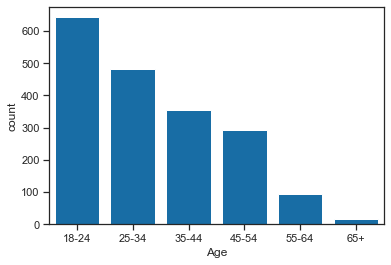

In [28]:
sns.countplot(x="Age", data=df, color='#0072BD', order = df['Age'].value_counts().index);

We got mostly young people from age 18-35. We see clearly that the vast majority of the individuals is between 18 and 34 (60%), while the number of observations is decreasing significantly for those inidividuals that are 54 or older.

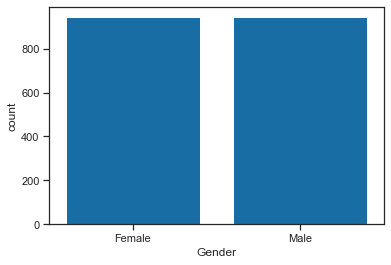

In [29]:
sns.countplot(x="Gender", data=df, color='#0072BD');

We have a perfect 50/50 split betwenn male and female observations

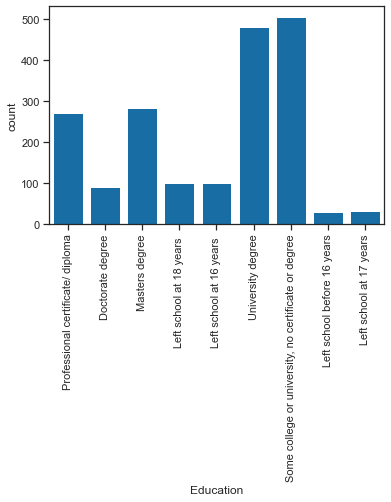

In [30]:
sns.countplot(x="Education", data=df, color='#0072BD')
plt.xticks(rotation=90);

More than a quarter of the observed individuals hold at least a degree from one college or university. Summing also the University, Masters degree as well as Professional diploma it's getting pretty obvious that we have an extremly well educated population here, who won't represent the overall population of the countries in focus.

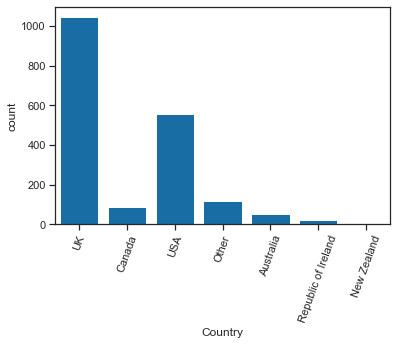

In [31]:
sns.countplot(x="Country", data=df, color='#0072BD')
plt.xticks(rotation=70);

We got only English speaking countries. 

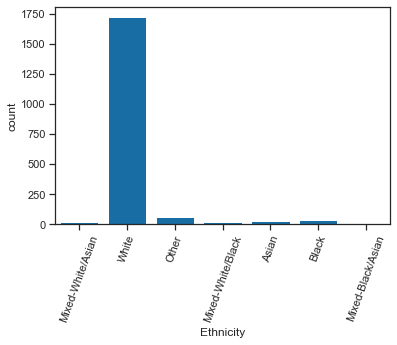

In [32]:
sns.countplot(x="Ethnicity", data=df, color='#0072BD')
plt.xticks(rotation=70);

As already said when checking the education feature the sample populations seems to be extremly biased. More than 91 % white individuals do not represent the overall population of the participating countries.


In [33]:
# create function to have multiple dataframes plotted side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# show occurrences and percentages
age_df = pd.DataFrame(df.Age.value_counts())
age_df['percentage'] = round(((age_df.Age / age_df.Age.sum())*100), 0)


gender_df = pd.DataFrame(df.Gender.value_counts())
gender_df['percentage'] = round(((gender_df.Gender / gender_df.Gender.sum())*100), 0)

ed_df = pd.DataFrame(df.Education.value_counts())
ed_df['percentage'] = round(((ed_df.Education / ed_df.Education.sum())*100), 0)

eth_df = pd.DataFrame(df.Ethnicity.value_counts())
eth_df['percentage'] = round(((eth_df.Ethnicity / eth_df.Ethnicity.sum())*100), 0)


display_side_by_side(age_df, gender_df, ed_df, eth_df)


Age 
 percentage 
 
 
 
 
 18-24 
 643 
 34.0 
 
 
 25-34 
 481 
 26.0 
 
 
 35-44 
 356 
 19.0 
 
 
 45-54 
 294 
 16.0 
 
 
 55-64 
 93 
 5.0 
 
 
 65+ 
 18 
 1.0 
 
 
 
 
 
 
 Gender 
 percentage 
 
 
 
 
 Male 
 943 
 50.0 
 
 
 Female 
 942 
 50.0 
 
 
 
 
 
 
 Education 
 percentage 
 
 
 
 
 Some college or university, no certificate or degree 
 506 
 27.0 
 
 
 University degree 
 480 
 25.0 
 
 
 Masters degree 
 283 
 15.0 
 
 
 Professional certificate/ diploma 
 270 
 14.0 
 
 
 Left school at 18 years 
 100 
 5.0 
 
 
 Left school at 16 years 
 99 
 5.0 
 
 
 Doctorate degree 
 89 
 5.0 
 
 
 Left school at 17 years 
 30 
 2.0 
 
 
 Left school before 16 years 
 28 
 1.0 
 
 
 
 
 
 
 Ethnicity 
 percentage 
 
 
 
 
 White 
 1720 
 91.0 
 
 
 Other 
 63 
 3.0 
 
 
 Black 
 33 
 2.0 
 
 
 Asian 
 26 
 1.0 
 
 
 Mixed-White/Black 
 20 
 1.0 
 
 
 Mixed-White/Asian 
 20 
 1.0 
 
 
 Mixed-Black/Asian 
 3 
 0.0

**Important observation:** The distribution of ethnicity and education in our dataset doesn't represent the overall distribution for the population in those countries. Therefor we'll have to be extremly carefull when concluding the results of our observations!

## Explore Psychometrics 

**From wikipidia**

In psychological trait theory, the Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a suggested taxonomy, or grouping, for personality traits,[1] developed from the 1980s onwards. When factor analysis (a statistical technique) is applied to personality survey data, it reveals semantic associations: some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". These associations suggest five broad dimensions used in common language to describe the human personality and psyche.

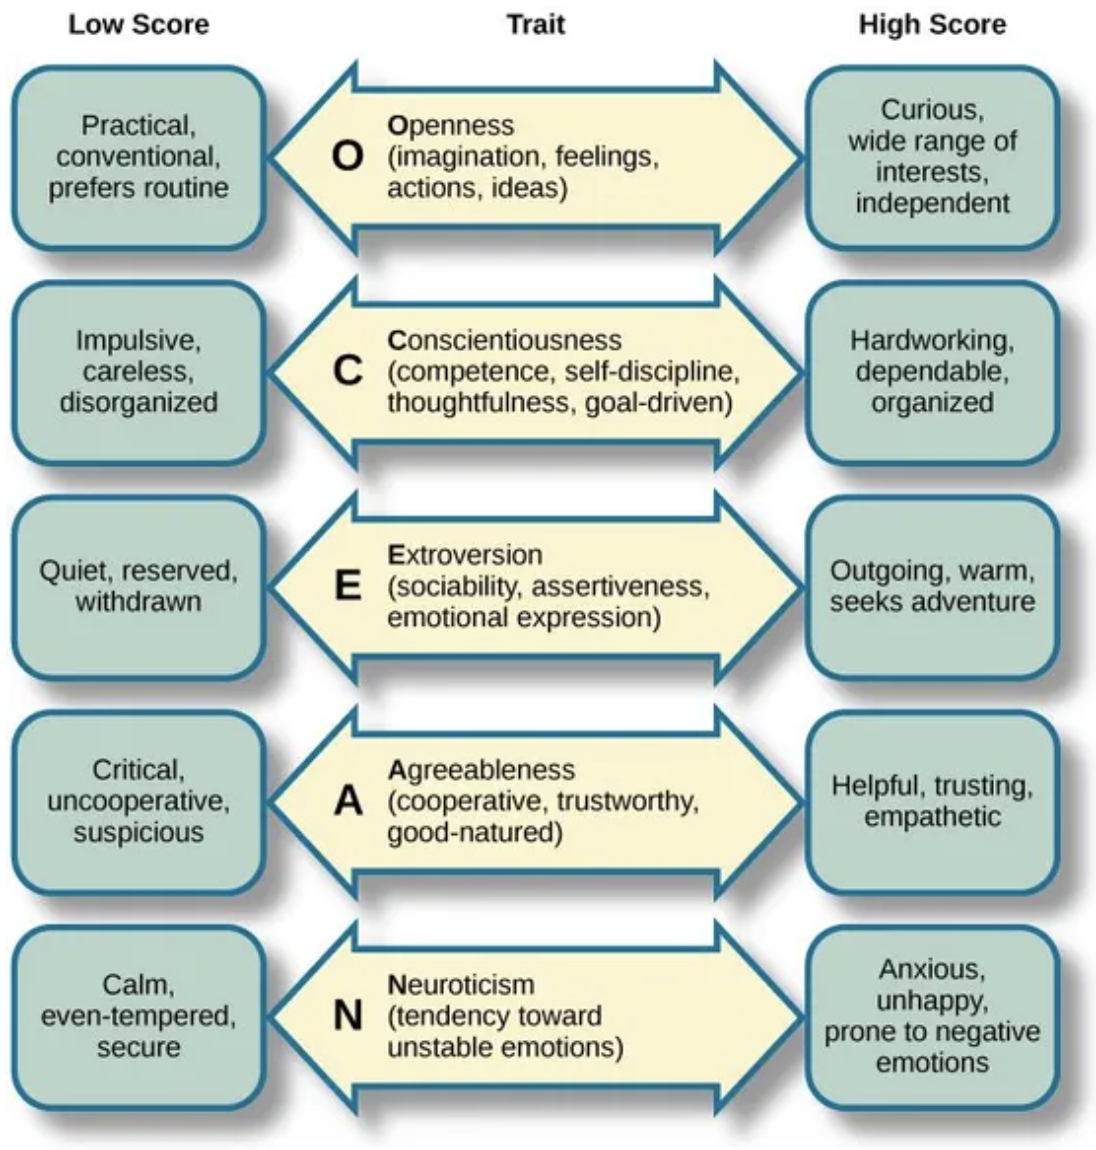


The theory identifies five factors:

- openness to experience (inventive/curious vs. consistent/cautious)
- conscientiousness (efficient/organized vs. extravagant/careless)
- extraversion (outgoing/energetic vs. solitary/reserved)
- agreeableness (friendly/compassionate vs. challenging/callous)
- neuroticism (sensitive/nervous vs. resilient/confident)

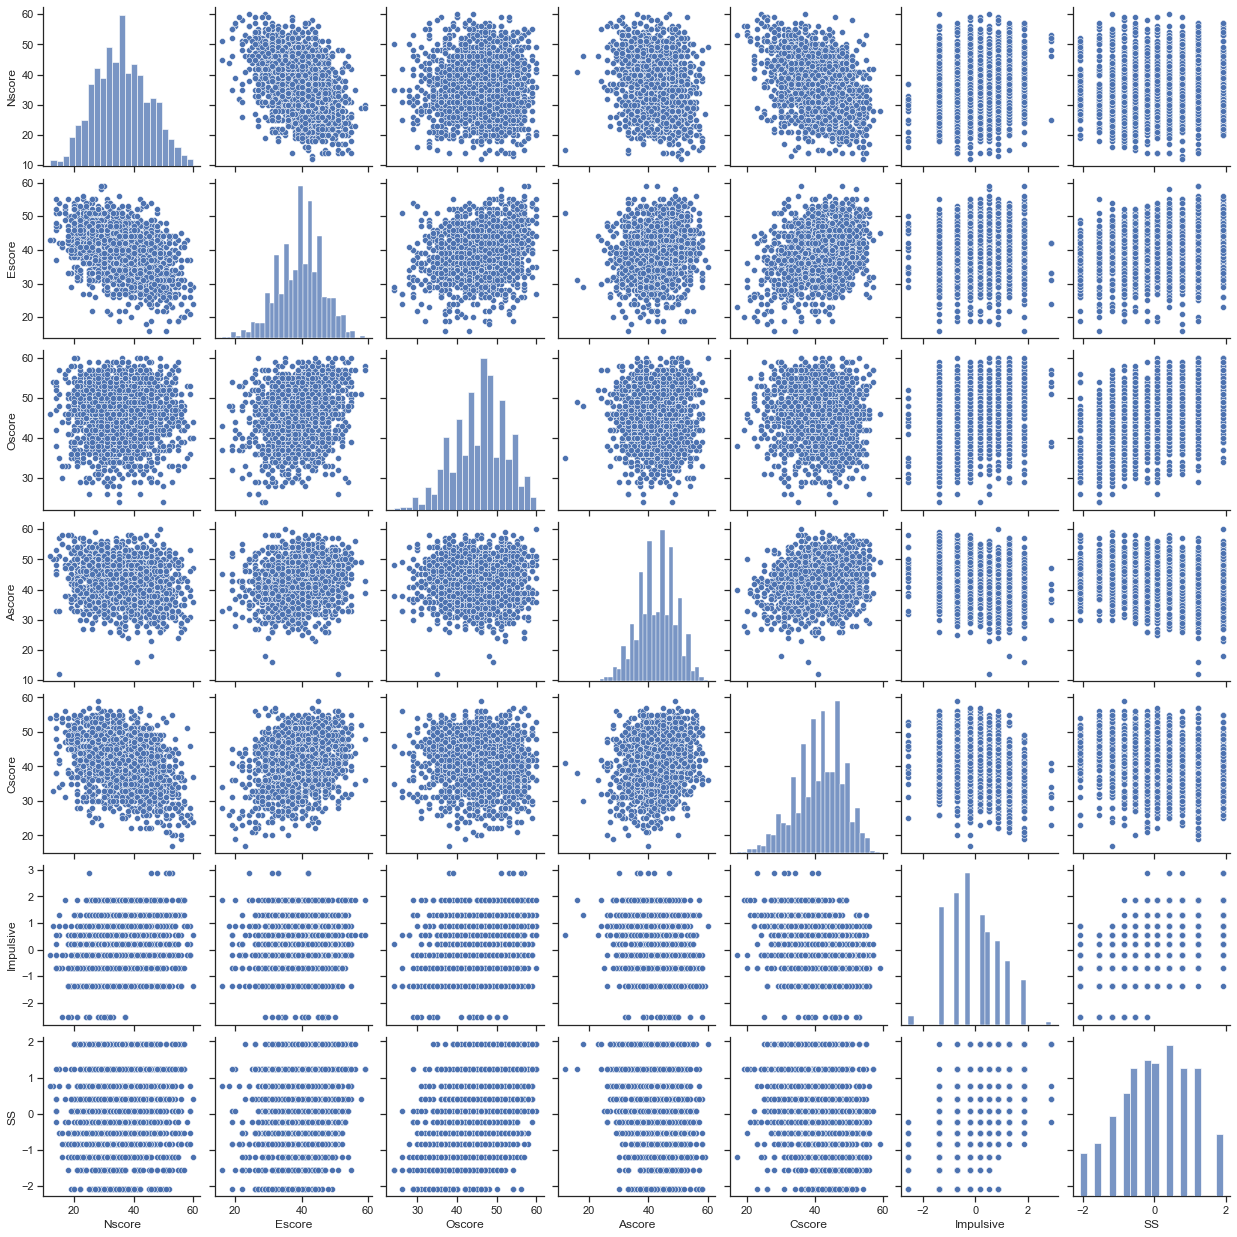

In [34]:
psy_df = pd.DataFrame(data=df, columns=psychometrics)
personality_dum=pd.get_dummies(psy_df.copy())

sns.pairplot(psy_df)

plt.savefig('figures/psychometrics_pairplot.png')

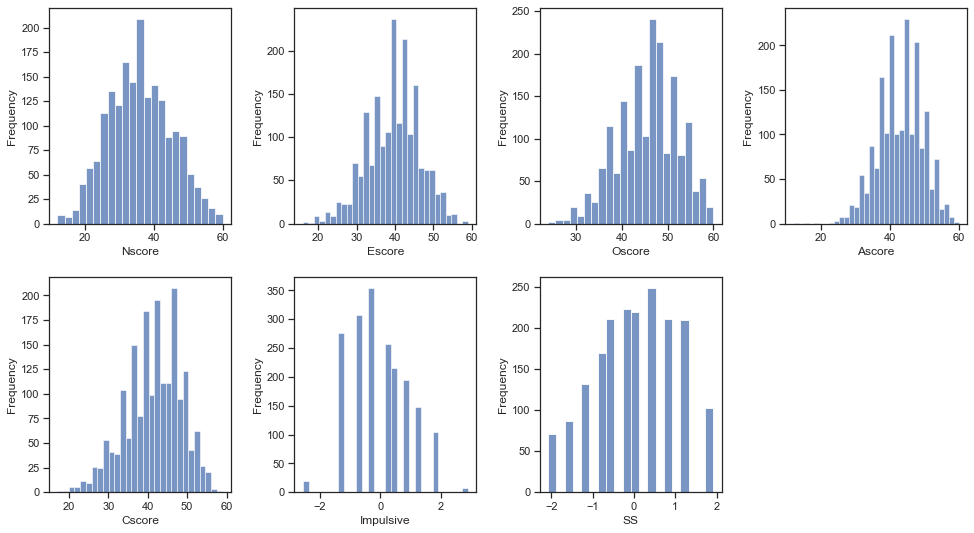

In [35]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

for index, feature in enumerate(psy_df.columns):
    plt.subplot(2, 4, index+1)
    plt.ylabel("Frequency")
    sns.histplot(psy_df[feature])

In [36]:
psy_df.describe().T

count       mean       std       min       25%       50%  \
Nscore     1885.0  35.921485  9.135869  12.00000  29.00000  36.00000   
Escore     1885.0  39.576127  6.771769  16.00000  35.00000  40.00000   
Oscore     1885.0  45.762334  6.579641  24.00000  41.00000  46.00000   
Ascore     1885.0  42.866313  6.438106  12.00000  39.00000  43.00000   
Cscore     1885.0  41.437135  6.966625  17.00000  37.00000  42.00000   
Impulsive  1885.0   0.007216  0.954435  -2.55524  -0.71126  -0.21712   
SS         1885.0  -0.003292  0.963701  -2.07848  -0.52593   0.07987   

                75%       max  
Nscore     42.00000  60.00000  
Escore     44.00000  59.00000  
Oscore     51.00000  60.00000  
Ascore     48.00000  60.00000  
Cscore     46.00000  59.00000  
Impulsive   0.52975   2.90161  
SS          0.76540   1.92173

It seems that we have for all the scores more or less a standard deviation of 1 and from the graphs we see that they are kinda normal distributed. So we are talking about standard normal distribution and if we have a closer look at our source for example for the nscore(how neurotic is a person) we have a scale from 1 to 60 and the people from our dataset are around 20-40. The same goes for the other 4 big of personality traits. So it seems that we deal with 'normal' people.   

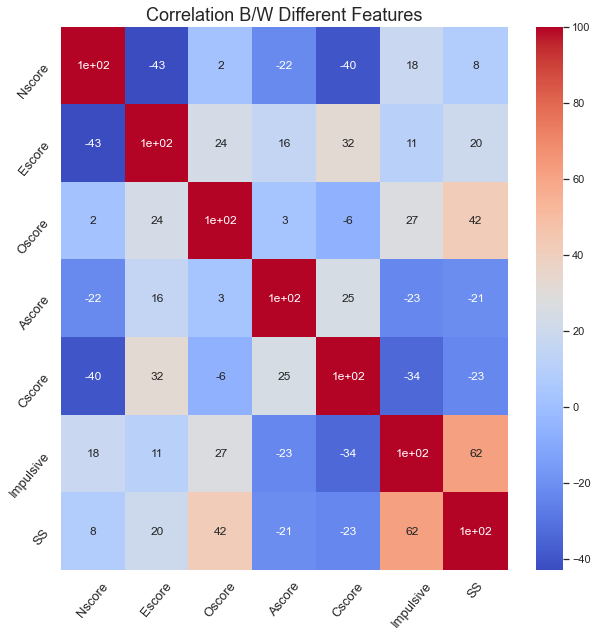

In [37]:
corrmat = round(psy_df.corr()*100,0)

plt.figure(figsize=(10,10))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = psy_df.columns, xticklabels = psy_df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

*From this graph we can see that in general:*
- people that scored high in neuroticism, score low in extroversion and consciousness.
- Impulsive people score high in Openness and low in Agreeableness and consciousness
- Extroverts score high in Openness and consciousness
- Sensession seeking people are very impulsive, score high to openness and relatively low in Agreeableness and consciousness 

Gender                                          Education  \
0     Female                  Professional certificate/ diploma   
1       Male                                   Doctorate degree   
2       Male                  Professional certificate/ diploma   
3     Female                                     Masters degree   
4     Female                                   Doctorate degree   
5     Female                           Left school at 18 years    
6       Male                                     Masters degree   
7       Male                           Left school at 16 years    
8     Female                  Professional certificate/ diploma   
9       Male                                     Masters degree   
10    Female                                  University degree   
11      Male  Some college or university, no certificate or ...   
12    Female                                  University degree   
13    Female                  Professional certificate/ diploma   
14    Female                  Professional certificate/ diploma   
15      Male                                  University degree   
16    Female  Some college or university, no certificate or ...   
17      Male                           Left school at 16 years    
18      Male                                  University degree   
19      Male                  Professional certificate/ diploma   
20      Male                  Professional certificate/ diploma   
21      Male                        Left school before 16 years   
22      Male                                  University degree   
23      Male                           Left school at 16 years    
24      Male                                  University degree   
25      Male  Some college or university, no certificate or ...   
26    Female                           Left school at 18 years    
27      Male                                  University degree   
28    Female                                     Masters degree   
29      Male                                   Doctorate degree   
...      ...                                                ...   
1855    Male                  Professional certificate/ diploma   
1856    Male  Some college or university, no certificate or ...   
1857    Male  Some college or university, no certificate or ...   
1858    Male                           Left school at 18 years    
1859    Male  Some college or university, no certificate or ...   
1860  Female                                  University degree   
1861  Female                                  University degree   
1862    Male                        Left school before 16 years   
1863  Female  Some college or university, no certificate or ...   
1864    Male  Some college or university, no certificate or ...   
1865  Female                  Professional certificate/ diploma   
1866  Female                                  University degree   
1867  Female  Some college or university, no certificate or ...   
1868    Male  Some college or university, no certificate or ...   
1869    Male  Some college or university, no certificate or ...   
1870  Female                                  University degree   
1871    Male                           Left school at 18 years    
1872    Male  Some college or university, no certificate or ...   
1873    Male                            Left school at 17 years   
1874    Male  Some college or university, no certificate or ...   
1875    Male  Some college or university, no certificate or ...   
1876    Male  Some college or university, no certificate or ...   
1877    Male                            Left school at 17 years   
1878    Male                                  University degree   
1879    Male  Some college or university, no certificate or ...   
1880  Female  Some college or university, no certificate or ...   
1881    Male  Some college or university, no certificate or ...   
1882  Female                                  Univers

In [81]:
corr_df

Gender                                          Education  \
0     Female                  Professional certificate/ diploma   
1       Male                                   Doctorate degree   
2       Male                  Professional certificate/ diploma   
3     Female                                     Masters degree   
4     Female                                   Doctorate degree   
5     Female                           Left school at 18 years    
6       Male                                     Masters degree   
7       Male                           Left school at 16 years    
8     Female                  Professional certificate/ diploma   
9       Male                                     Masters degree   
10    Female                                  University degree   
11      Male  Some college or university, no certificate or ...   
12    Female                                  University degree   
13    Female                  Professional certificate/ diploma   
14    Female                  Professional certificate/ diploma   
15      Male                                  University degree   
16    Female  Some college or university, no certificate or ...   
17      Male                           Left school at 16 years    
18      Male                                  University degree   
19      Male                  Professional certificate/ diploma   
20      Male                  Professional certificate/ diploma   
21      Male                        Left school before 16 years   
22      Male                                  University degree   
23      Male                           Left school at 16 years    
24      Male                                  University degree   
25      Male  Some college or university, no certificate or ...   
26    Female                           Left school at 18 years    
27      Male                                  University degree   
28    Female                                     Masters degree   
29      Male                                   Doctorate degree   
...      ...                                                ...   
1855    Male                  Professional certificate/ diploma   
1856    Male  Some college or university, no certificate or ...   
1857    Male  Some college or university, no certificate or ...   
1858    Male                           Left school at 18 years    
1859    Male  Some college or university, no certificate or ...   
1860  Female                                  University degree   
1861  Female                                  University degree   
1862    Male                        Left school before 16 years   
1863  Female  Some college or university, no certificate or ...   
1864    Male  Some college or university, no certificate or ...   
1865  Female                  Professional certificate/ diploma   
1866  Female                                  University degree   
1867  Female  Some college or university, no certificate or ...   
1868    Male  Some college or university, no certificate or ...   
1869    Male  Some college or university, no certificate or ...   
1870  Female                                  University degree   
1871    Male                           Left school at 18 years    
1872    Male  Some college or university, no certificate or ...   
1873    Male                            Left school at 17 years   
1874    Male  Some college or university, no certificate or ...   
1875    Male  Some college or university, no certificate or ...   
1876    Male  Some college or university, no certificate or ...   
1877    Male                            Left school at 17 years   
1878    Male                                  University degree   
1879    Male  Some college or university, no certificate or ...   
1880  Female  Some college or university, no certificate or ...   
1881    Male  Some college or university, no certificate or ...   
1882  Female                                  Univers

In [91]:
corr_df = df.iloc[:,1:5].copy()
corr_df["hard_usage"] = df.hard_usage

X_dum = pd.get_dummies(corr_df, drop_first=True)
corrmat = round(X_dum.corr()*100,0)

plt.figure(figsize=(15,15))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = X_dum.columns, xticklabels = X_dum.columns)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Demographics and hard drug usage",fontsize=18)
plt.show()b

SyntaxError: invalid syntax (<ipython-input-91-cc572786637d>, line 15)

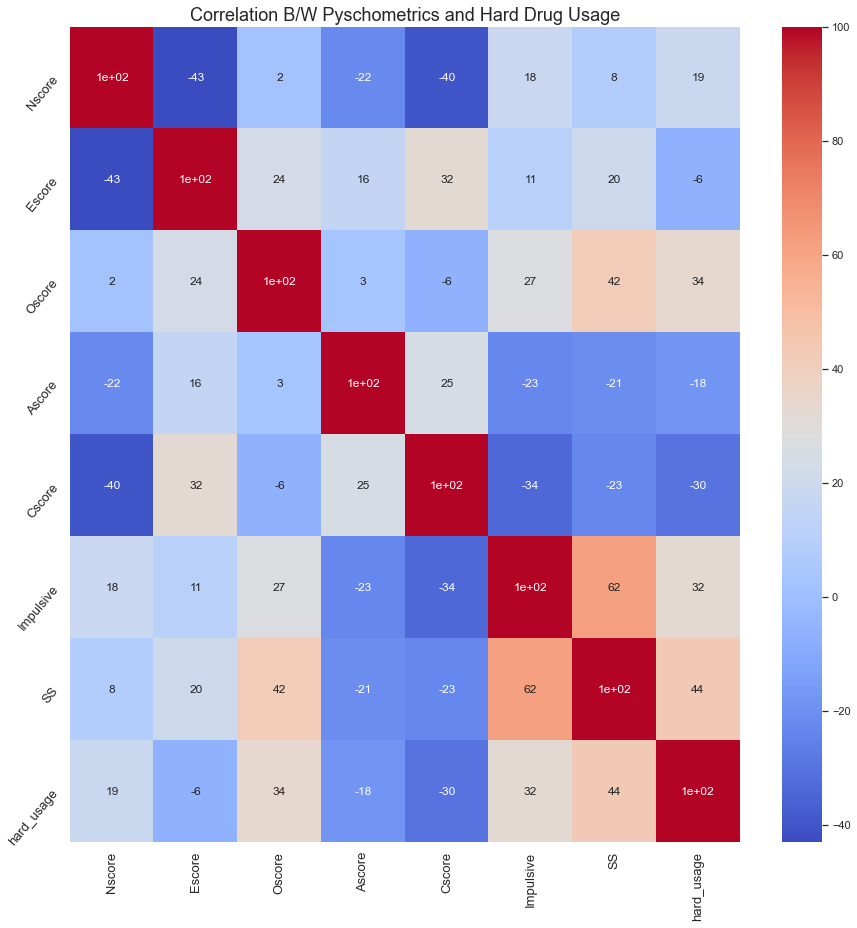

In [90]:
corr_df2 = df.iloc[:,5:12].copy()
corr_df2["hard_usage"] = df.hard_usage

X_dum = pd.get_dummies(corr_df2, drop_first=True)
corrmat = round(X_dum.corr()*100,0)

plt.figure(figsize=(15,15))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = X_dum.columns, xticklabels = X_dum.columns)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Pyschometrics and Hard Drug Usage",fontsize=18)
plt.show()

## Explore Substance Usage 

We know from our source:
- CL0 Never Used 
- CL1 Used over a Decade Ago 
- CL2 Used in Last Decade 
- CL3 Used in Last Year 
- CL4 Used in Last Month 
- CL5 Used in Last Week 
- CL6 Used in Last Day 

In [38]:
df_users = df.copy()
df.head()

Age  Gender                          Education Country  \
0  35-44  Female  Professional certificate/ diploma      UK   
1  25-34    Male                   Doctorate degree      UK   
2  35-44    Male  Professional certificate/ diploma      UK   
3  18-24  Female                     Masters degree      UK   
4  35-44  Female                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  Ecstasy  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...      CL0   
1              White    29.0    52.0    55.0    48.0    41.0  ...      CL4   
2              White    31.0    45.0    40.0    32.0    34.0  ...      CL0   
3              White    34.0    34.0    46.0    47.0    46.0  ...      CL0   
4              White    43.0    28.0    43.0    41.0    50.0  ...      CL1   

   Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine Semer  VSA  
0     CL0      CL0    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
1     CL0      CL2    CL0  CL2  CL3     CL0      CL4   CL0  CL0  
2     CL0      CL0    CL0  CL0  CL0     CL1      CL0   CL0  CL0  
3     CL0      CL2    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
4     CL0      CL0    CL1  CL0  CL0     CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

In [39]:
drugs_col = df_users.columns[12:]
drugs_use = ['use_'+i for i in drugs_col]

In [40]:
for column in drugs_col:
    le = LabelEncoder()
    df_users[column] = le.fit_transform(df_users[column])

In [41]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    df_users.loc[(df_users[drugs_col[i]] <= 2),drugs_use[i]] = 0
    df_users.loc[(df_users[drugs_col[i]] > 2),drugs_use[i]] = 1

In [42]:
df_users

Age  Gender                                          Education  \
0     35-44  Female                  Professional certificate/ diploma   
1     25-34    Male                                   Doctorate degree   
2     35-44    Male                  Professional certificate/ diploma   
3     18-24  Female                                     Masters degree   
4     35-44  Female                                   Doctorate degree   
5       65+  Female                           Left school at 18 years    
6     45-54    Male                                     Masters degree   
7     35-44    Male                           Left school at 16 years    
8     35-44  Female                  Professional certificate/ diploma   
9     55-64    Male                                     Masters degree   
10    25-34  Female                                  University degree   
11    45-54    Male  Some college or university, no certificate or ...   
12    55-64  Female                                  University degree   
13    55-64  Female                  Professional certificate/ diploma   
14    55-64  Female                  Professional certificate/ diploma   
15    55-64    Male                                  University degree   
16    35-44  Female  Some college or university, no certificate or ...   
17    45-54    Male                           Left school at 16 years    
18    55-64    Male                                  University degree   
19    35-44    Male                  Professional certificate/ diploma   
20    45-54    Male                  Professional certificate/ diploma   
21      65+    Male                        Left school before 16 years   
22    45-54    Male                                  University degree   
23    45-54    Male                           Left school at 16 years    
24    55-64    Male                                  University degree   
25    45-54    Male  Some college or university, no certificate or ...   
26    55-64  Female                           Left school at 18 years    
27    35-44    Male                                  University degree   
28    35-44  Female                                     Masters degree   
29    45-54    Male                                   Doctorate degree   
...     ...     ...                                                ...   
1855  35-44    Male                  Professional certificate/ diploma   
1856  18-24    Male  Some college or university, no certificate or ...   
1857  18-24    Male  Some college or university, no certificate or ...   
1858  18-24    Male                           Left school at 18 years    
1859  35-44    Male  Some college or university, no certificate or ...   
1860  55-64  Female                                  University degree   
1861  25-34  Female                                  University degree   
1862  45-54    Male                        Left school before 16 years   
1863  18-24  Female  Some college or university, no certificate or ...   
1864  25-34    Male  Some college or university, no certificate or ...   
1865  18-24  Female                  Professional certificate/ diploma   
1866  18-24  Female                                  University degree   
1867  18-24  Female  Some college or university, no certificate or ...   
1868  18-24    Male  Some college or university, no certificate or ...   
1869  18-24    Male  Some college or university, no certificate or ...   
1870  25-34  Female                                  University degree   
1871  18-24    Male                           Left school at 18 years    
1872  18-24    Male  Some college or university, no certificate or ...   
1873  18-24    Male                            Left school at 17 years   
1874    65+    Male  Some college or university, no certificate or ...   
1875  18-24    Male  Some college or university, no certificate or ...   
1876  25-34    Male  Some college or university, no certificate or ...   
1877  18-24 

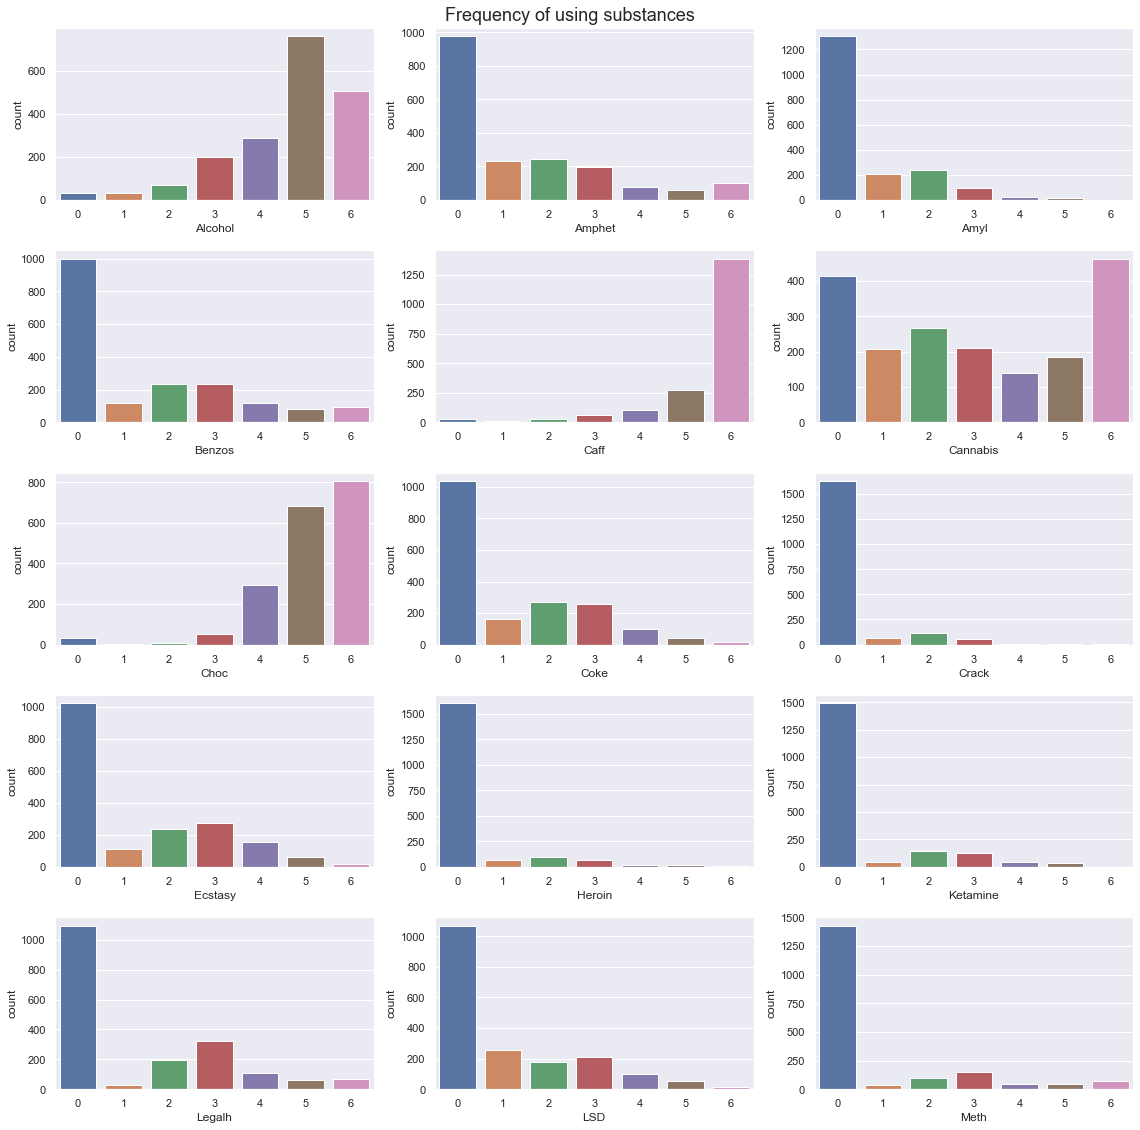

In [43]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Frequency of using substances",fontsize=18)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=drugs_col[k], data=df_users ,ax=axes[i][j],) 
        k+=1 

plt.tight_layout()
plt.show()

# Feature Engineering

## Classify drug usage 

In [44]:
count_of_users = []
count_of_non_users = []

In [45]:
for i in range(len(drugs_col)):
    s = df_users.groupby([drugs_use[i]])[drugs_col[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

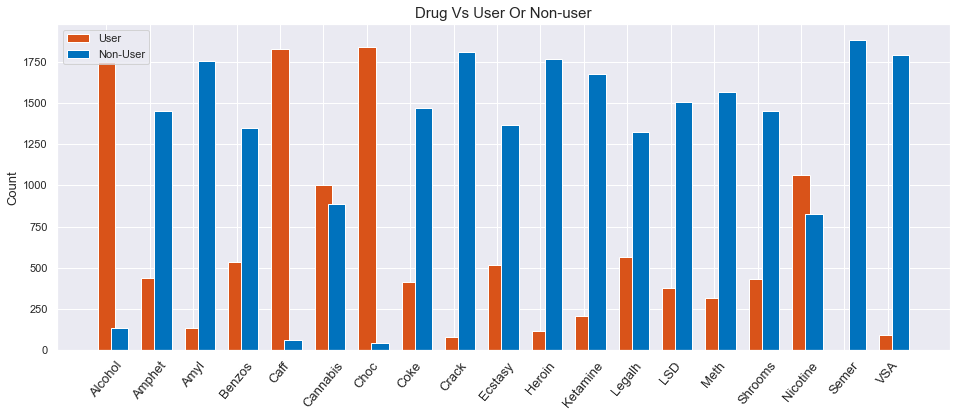

In [46]:
bins = np.arange(1,20,1)
plt.figure(figsize=(16,6))
plt.bar(bins,count_of_users,width=0.4,label ='User', color='#D95319')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User', color='#0072BD')
plt.xticks(bins,drugs_col,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=15)
plt.legend();

## Separation of soft and hard drugs 

We create a distinction of soft and hard drugs, based on the differentation of the Amsterdam Info website: 
https://www.amsterdam.info/drugs/#:~:text=Soft%20drugs%20as%20cannabis%20in,so%20called%20%22personal%20use%22.

In [47]:
soft_use = df_users.loc[:, ['use_Nicotine', 'use_Cannabis', 'use_Shrooms']]
soft_col_use = ['use_Nicotine', 'use_Cannabis', 'use_Shrooms']
hard_col_use = [i for i in drugs_use if i not in [
                'use_Alcohol', 'use_Nicotine', 'use_Cannabis',
                'use_Caff', 'use_Choc', 'use_Shrooms']
               ]
hard_use = df_users.loc[:, hard_col_use]

In [48]:
soft= df_users.loc[:,['Nicotine', 'Cannabis','Shrooms']]
hard_col= [i for i in drugs_col if i not in ['Alcohol','Nicotine', 'Cannabis', 'Caff', 'Choc', 'Shrooms']]
hard= df_users.loc[:,hard_col]

In [49]:
hard_dum=pd.get_dummies(hard.copy())
pers_hard = psy_df.join(hard_dum) 

In [50]:
soft

Nicotine  Cannabis  Shrooms
0            2         0        0
1            4         4        0
2            0         3        1
3            2         2        0
4            2         3        2
5            6         0        0
6            6         1        0
7            0         0        0
8            6         0        0
9            6         1        0
10           2         2        0
11           6         4        2
12           6         3        1
13           1         0        0
14           6         0        0
15           0         1        0
16           6         3        0
17           6         6        1
18           0         3        1
19           1         1        0
20           3         2        1
21           1         1        1
22           0         0        0
23           6         2        0
24           6         1        1
25           1         1        2
26           6         1        0
27           2         6        3
28           0         1        0
29           0         0        0
...        ...       ...      ...
1855         2         4        5
1856         4         4        0
1857         3         5        3
1858         6         6        5
1859         6         6        4
1860         2         6        2
1861         4         3        2
1862         6         6        1
1863         5         6        4
1864         6         6        4
1865         6         6        3
1866         4         6        3
1867         6         6        2
1868         6         6        4
1869         4         5        3
1870         5         5        1
1871         6         6        0
1872         0         6        0
1873         6         6        3
1874         0         3        1
1875         6         5        4
1876         2         6        4
1877         6         5        0
1878         2         5        2
1879         6         6        0
1880         0         5        0
1881         5         3        4
1882         6         6        2
1883         4         6        3
1884         6         3        3

[1885 rows x 3 columns]

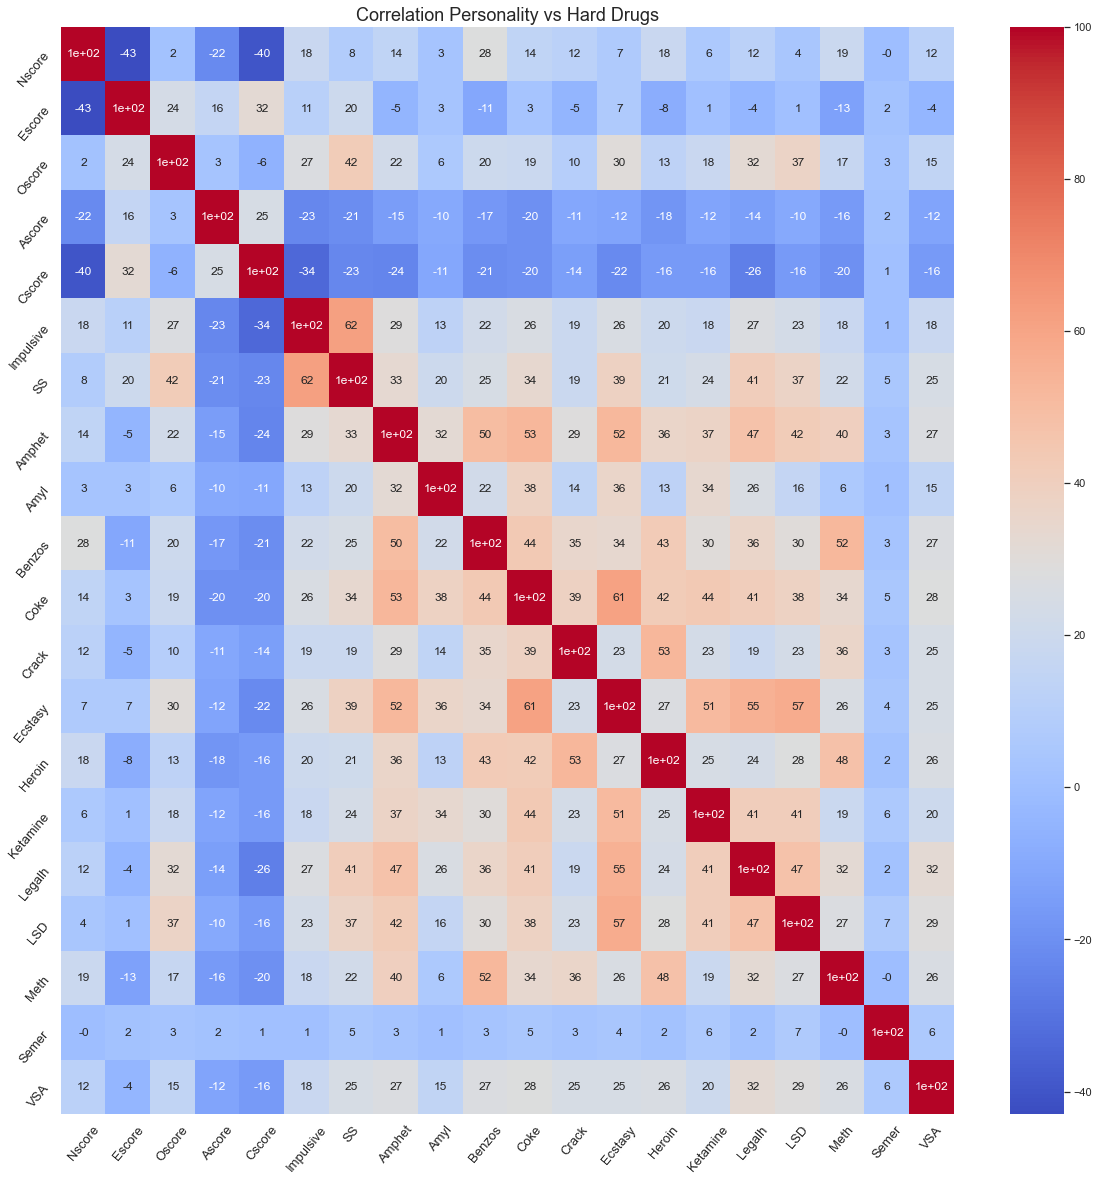

In [51]:
corrmat1 = round(pers_hard.corr()*100,0)

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat1,cmap = 'coolwarm',annot=True,
             yticklabels = pers_hard.columns, xticklabels = pers_hard.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation Personality vs Hard Drugs",fontsize=18)
plt.show();

In [52]:
soft_plus = df_users.loc[:,['Alcohol','Nicotine', 'Cannabis', 'Caff', 'Choc', 'Shrooms']] # soft + Caffeine and chocolate
soft_plus_dum=pd.get_dummies(soft_plus.copy())
pers_soft_plus = psy_df.join(soft_plus_dum) 

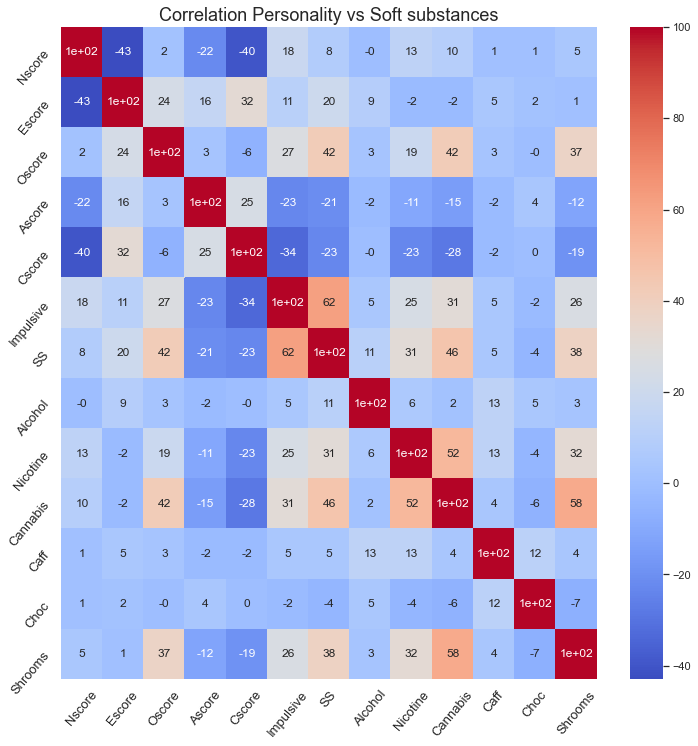

In [53]:
corrmat1 = round(pers_soft_plus.corr()*100,0)

plt.figure(figsize=(12,12))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat1,cmap = 'coolwarm',annot=True,
             yticklabels = pers_soft_plus.columns, xticklabels = pers_soft_plus.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation Personality vs Soft substances",fontsize=18)
plt.show()

## Overall usage of hard / soft drugs 

In [54]:
df['hard_usage'] = pd.np.where(df_users[hard_col_use].eq(1).any(1, skipna=True), 1, 0)
df_users["hard_usage"] = df.hard_usage

In [55]:
df.hard_usage.value_counts()

1    1032
0     853
Name: hard_usage, dtype: int64

In [56]:
df['soft_usage'] = pd.np.where(df_users[soft_col_use].eq(1).any(1, skipna=True), 1, 0)
df_users["soft_usage"] = df.soft_usage

In [57]:
df.soft_usage.value_counts()

1    1262
0     623
Name: soft_usage, dtype: int64

## Finding most common combinations of hard drugs 

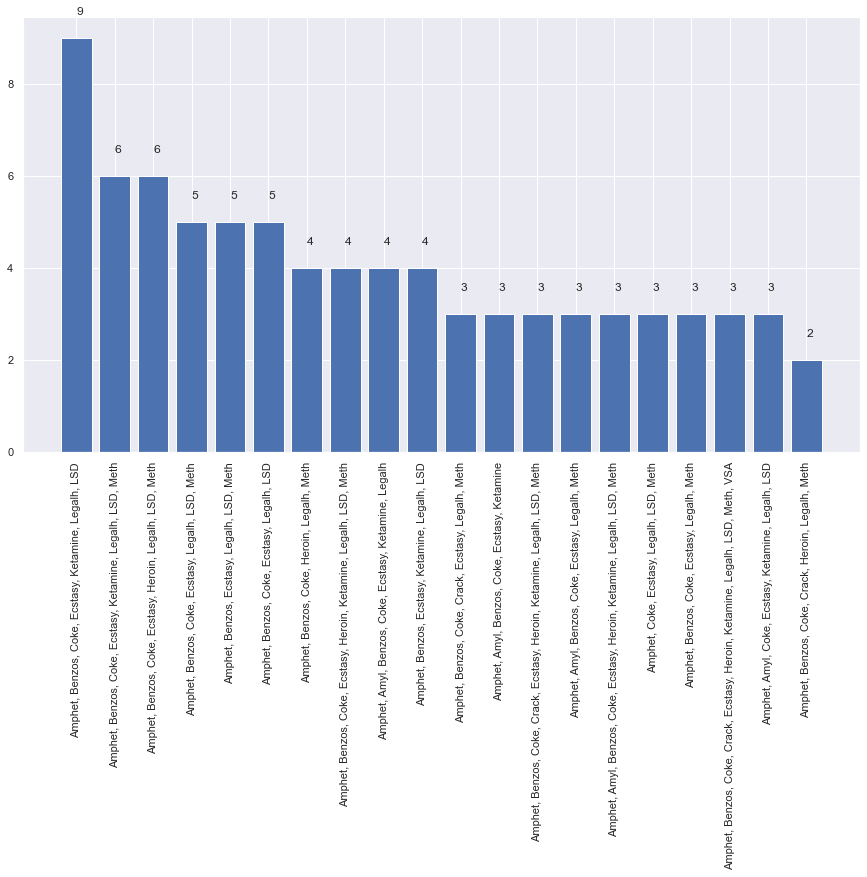

In [58]:
# create a copy of the hard drug usage dateframe
mc = hard_use.copy()

# remove "use_" from column name, replace all True values with corresponding column name
mc.columns = mc.columns.str.replace("use_","")
mc = mc.loc[:, :].replace(1, pd.Series(mc.columns, mc.columns))

# create list from all column values
mc["combination"] = mc.values.tolist()

# delete the zeros
mc.combination = mc.combination.apply(lambda x: [i for i in x if i != 0])

# count number of elements
mc['combi_length'] = mc.combination.apply(lambda x: len(x))

# return results
mc.combination = mc.combination.apply(lambda x: ', '.join(map(str, x)))
result = mc.query("combi_length > 5").combination.value_counts().head(20)
result

# plot results
y = result.values
x = result.index
plt.figure(figsize=(15,8))
plt.bar(x, y)


plt.xticks(rotation=90)
for i, v in enumerate(y):
    plt.text(x=x[i], y=v + 0.5, s=str(v))

In [59]:
mc["lenght_text"] = mc.combi_length.apply(lambda x:"Usage of "+str(x)+" different drugs")

<AxesSubplot:>

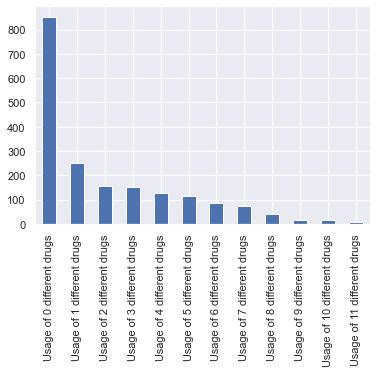

In [59]:
mc.lenght_text.value_counts().plot(kind="bar")

# Baseline Prediction Modeling on Target Variables 

## Creating a pipeline 

### Creating a preprocessing pipeline 

## Target: User of Hard Drugs 

**Using transformed demographic and psychometric data**

In [63]:
# selecting the features and target (all general and psychometrics)
X = df.iloc[:, :12]
y = df.hard_usage

categoric_features = list(X.columns[X.dtypes==object])
categoric_features

numeric_features = list(X.columns[X.dtypes != object])
numeric_features

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       651
           1       0.83      0.81      0.82       762

    accuracy                           0.80      1413
   macro avg       0.80      0.80      0.80      1413
weighted avg       0.80      0.80      0.80      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       202
           1       0.84      0.81      0.83       270

    accuracy                           0.81       472
   macro avg       0.80      0.80      0.80       472
weighted avg       0.81      0.81      0.81       472




/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator


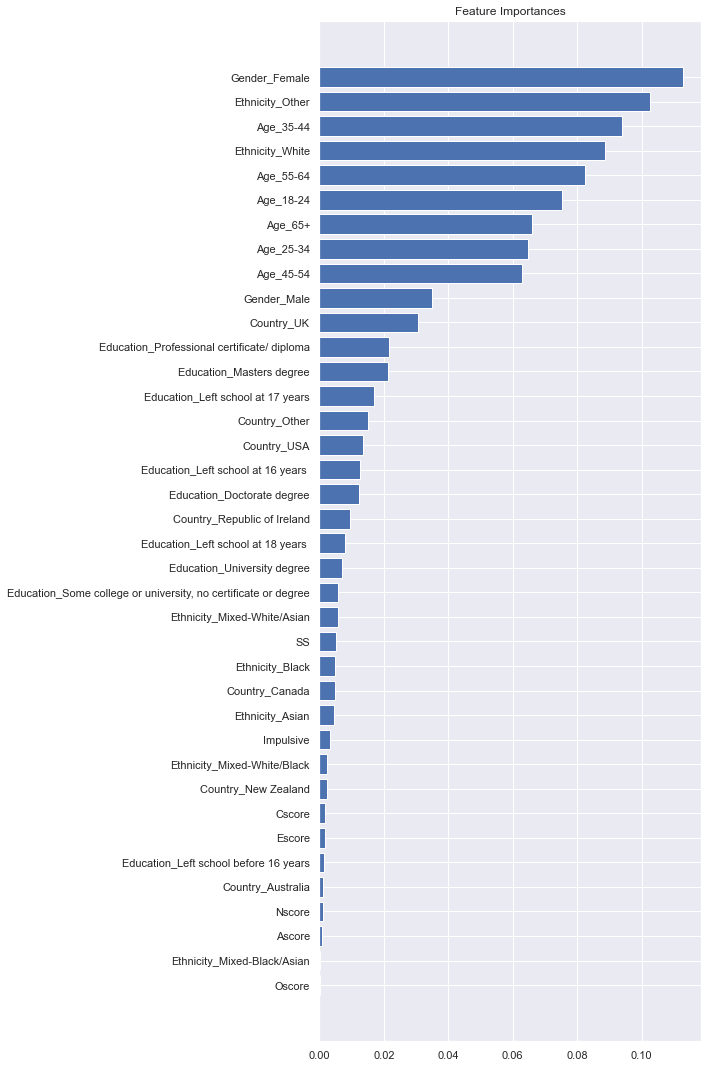


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       651
           1       0.82      0.79      0.81       762

    accuracy                           0.80      1413
   macro avg       0.79      0.80      0.79      1413
weighted avg       0.80      0.80      0.80      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       202
           1       0.84      0.80      0.82       270

    accuracy                           0.79       472
   macro avg       0.79      0.79      0.79       472
weighted avg       0.80      0.79      0.80       472




/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator


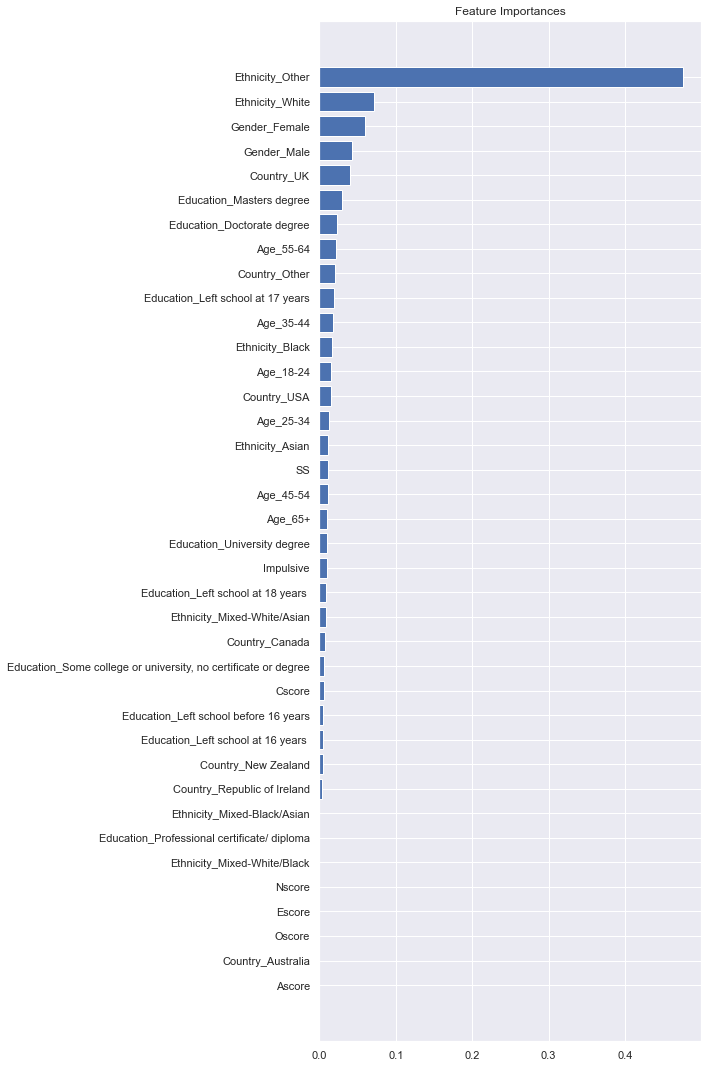


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       651
           1       0.82      0.78      0.80       762

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       202
           1       0.84      0.76      0.79       270

    accuracy                           0.78       472
   macro avg       0.77      0.78      0.77       472
weighted avg       0.78      0.78      0.78       472


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       651
           1       0.83      0.81      0.

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator


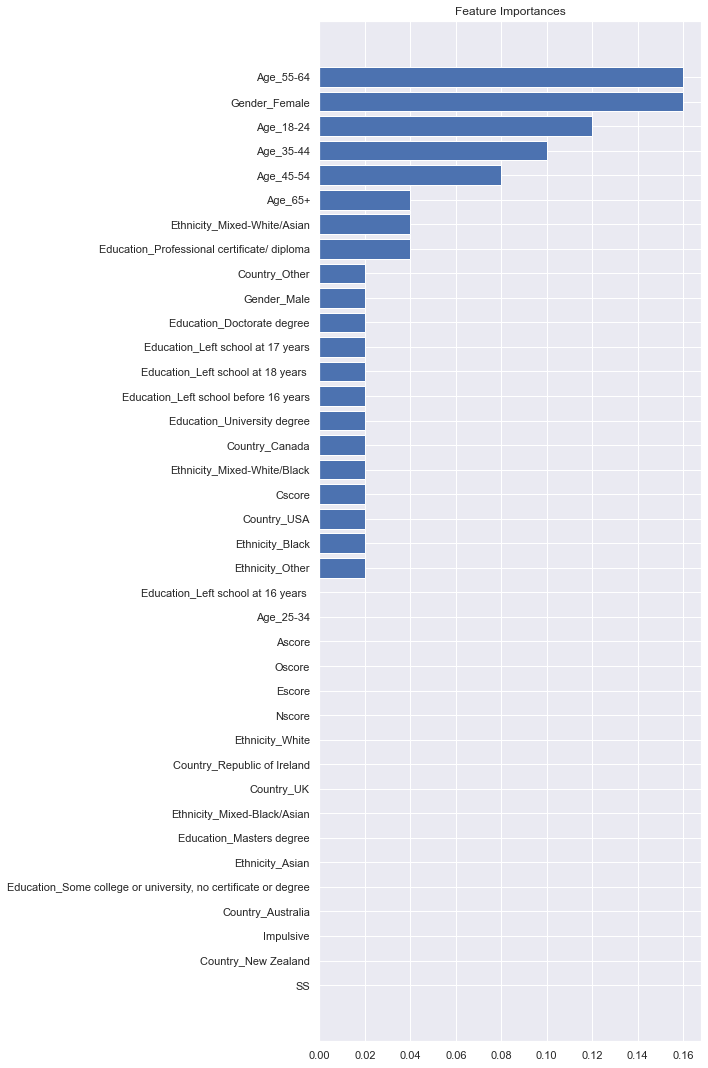


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       651
           1       0.72      0.73      0.73       762

    accuracy                           0.70      1413
   macro avg       0.70      0.70      0.70      1413
weighted avg       0.70      0.70      0.70      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       202
           1       0.75      0.73      0.74       270

    accuracy                           0.71       472
   macro avg       0.70      0.70      0.70       472
weighted avg       0.71      0.71      0.71       472




/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator


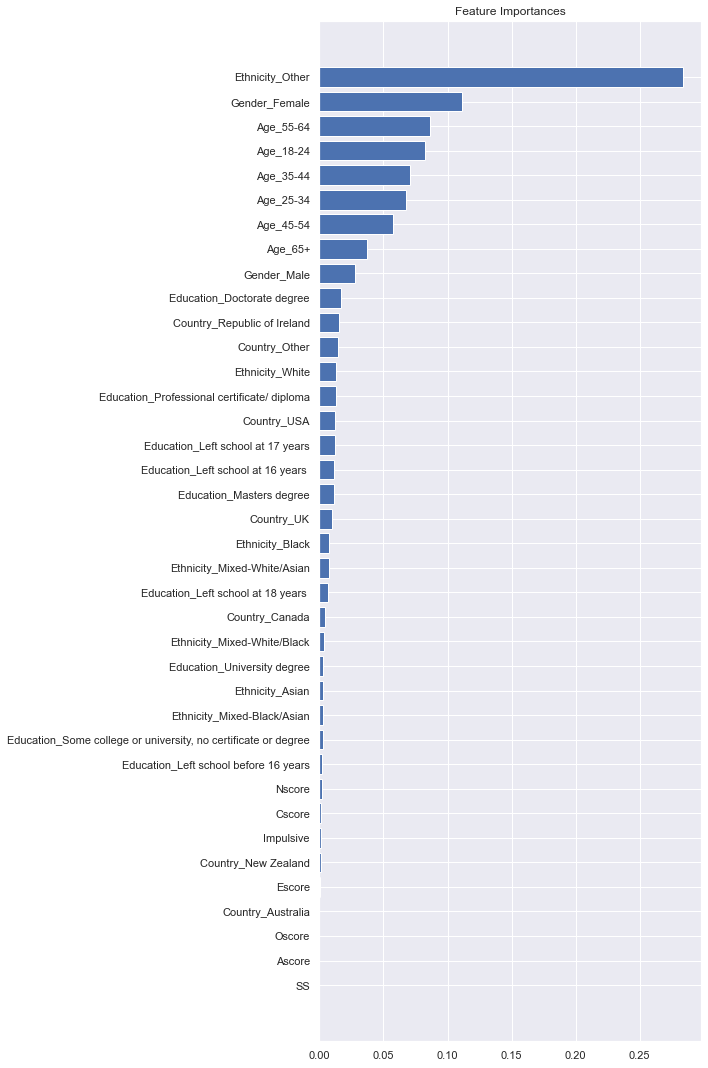

In [64]:
# defining the models
models = [
    RandomForestClassifier, 
    XGBClassifier,
    KNeighborsClassifier,
    SVC,
    LogisticRegression,
    AdaBoostClassifier,
    DecisionTreeClassifier,
]

# create preprocessors
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])


# process pipeline for every model


for model in models:
    print('\n'+str(model))
    pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', model())
                           ])
    
    
    # fit model
    pipe.fit(X_train, y_train)  

    
    #predict results
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    y_test_pred = pipe.predict(X_test)
    
    # print results

    print("\nResults on training data: ")
    print(classification_report(y_train, y_train_pred))
    print("\nResults on test data:")
    print(classification_report(y_test, y_test_pred))
    print()
    
    
    # feature importance
    try:
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['onehot'])
        feature_names = ohe.get_feature_names(input_features=categoric_features)
        feature_names = np.r_[feature_names, numeric_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')
    
    
    
    

**Using _original_ demographic and psychometric data**

In [71]:
odf = pd.read_csv('data/original_clean.csv')

In [72]:
# selecting the features and target (all general and psychometrics)
odf = pd.read_csv('data/original_clean.csv')
X = odf.iloc[:, 1:13]
y = df.hard_usage

categoric_features = list(X.columns[X.dtypes==object])
categoric_features

numeric_features = list(X.columns[X.dtypes != object])
numeric_features

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [73]:
# defining the models
models = [
    RandomForestClassifier, 
    XGBClassifier,
    KNeighborsClassifier,
    SVC,
    LogisticRegression,
    AdaBoostClassifier,
    DecisionTreeClassifier,
]

# create preprocessors
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])


# process pipeline for every model


for model in models:
    print('\n'+str(model))
    pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', model())
                           ])
    
    
    # fit model
    pipe.fit(X_train, y_train)  

    
    #predict results
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    y_test_pred = pipe.predict(X_test)
    
    # print results

    print("\nResults on training data: ")
    print(classification_report(y_train, y_train_pred))
    print("\nResults on test data:")
    print(classification_report(y_test, y_test_pred))
    print()
    
    
    # feature importance
    try:
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['onehot'])
        feature_names = ohe.get_feature_names(input_features=categoric_features)
        feature_names = np.r_[feature_names, numeric_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')
    
    
    
    


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       651
           1       0.82      0.81      0.82       762

    accuracy                           0.80      1413
   macro avg       0.80      0.80      0.80      1413
weighted avg       0.80      0.80      0.80      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       202
           1       0.84      0.81      0.83       270

    accuracy                           0.81       472
   macro avg       0.80      0.80      0.80       472
weighted avg       0.81      0.81      0.81       472


Did not work!

<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       651
           1       0.81      0.79      0.80

## Target: Hard drug usage based on soft drug usage and gender 

In [72]:
# selecting the features and target (all general and psychometrics)
X = df[["Gender", "soft_usage"]]
y = df.hard_usage

categoric_features = list(X.columns[X.dtypes==object])
categoric_features

numeric_features = list(X.columns[X.dtypes != object])
numeric_features

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       651
           1       0.74      0.91      0.81       762

    accuracy                           0.78      1413
   macro avg       0.80      0.76      0.77      1413
weighted avg       0.79      0.78      0.77      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       202
           1       0.77      0.91      0.83       270

    accuracy                           0.79       472
   macro avg       0.80      0.77      0.77       472
weighted avg       0.80      0.79      0.78       472




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


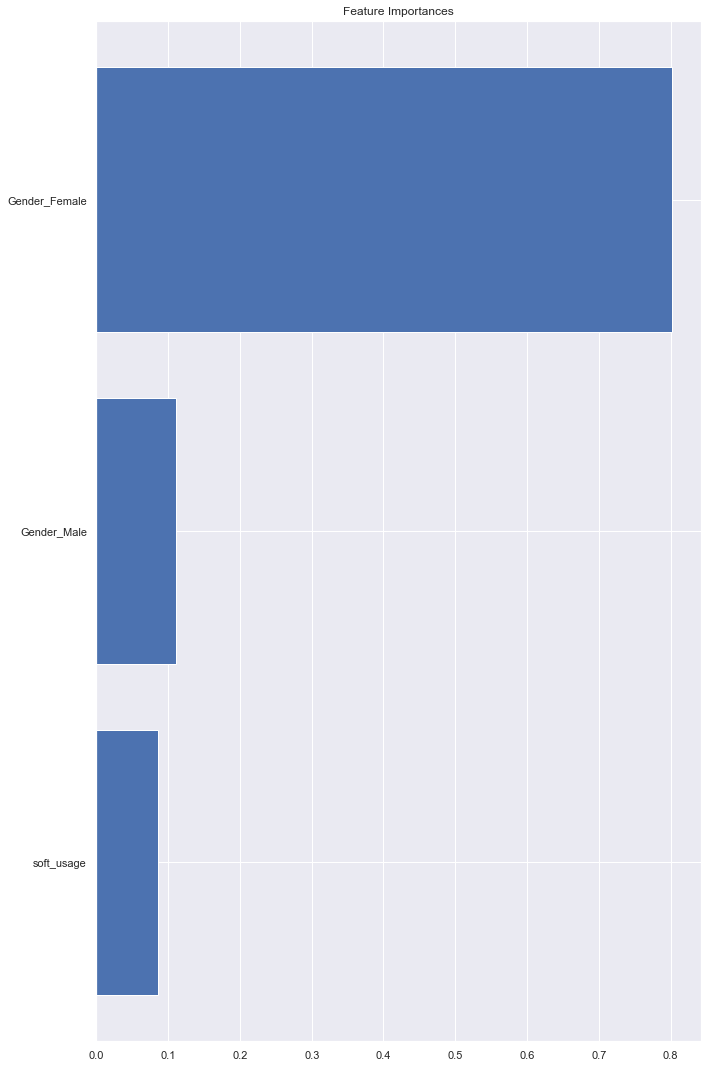


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       651
           1       0.74      0.91      0.81       762

    accuracy                           0.78      1413
   macro avg       0.80      0.76      0.77      1413
weighted avg       0.79      0.78      0.77      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       202
           1       0.77      0.91      0.83       270

    accuracy                           0.79       472
   macro avg       0.80      0.77      0.77       472
weighted avg       0.80      0.79      0.78       472




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


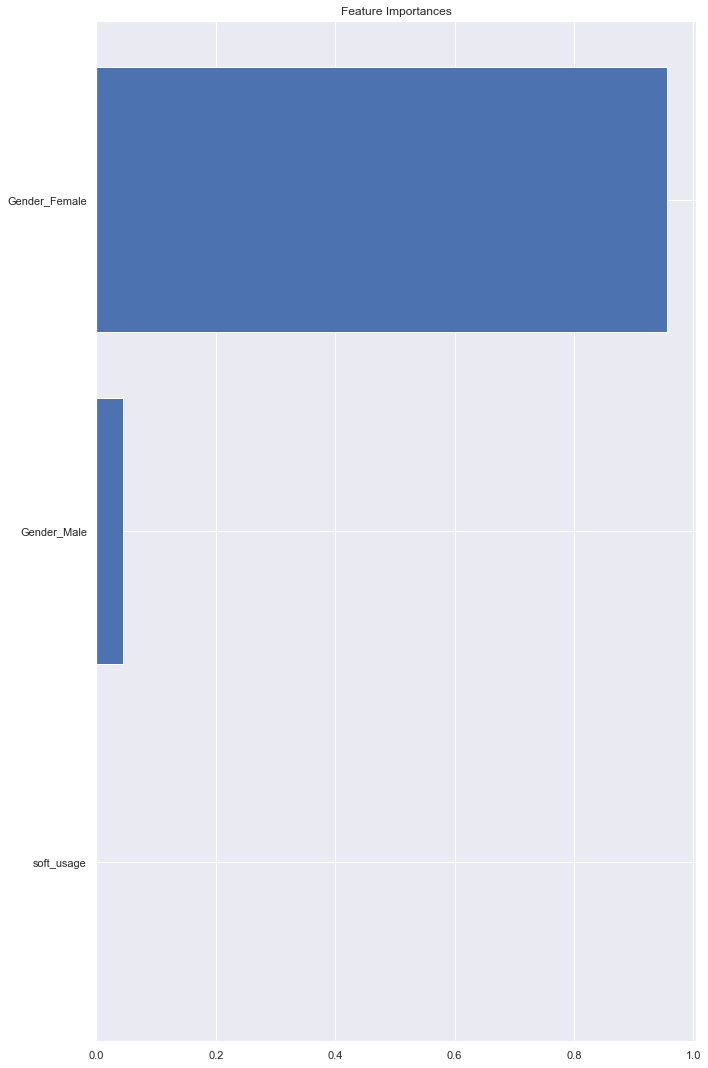


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       651
           1       0.74      0.91      0.81       762

    accuracy                           0.78      1413
   macro avg       0.80      0.76      0.77      1413
weighted avg       0.79      0.78      0.77      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       202
           1       0.77      0.91      0.83       270

    accuracy                           0.79       472
   macro avg       0.80      0.77      0.77       472
weighted avg       0.80      0.79      0.78       472


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       651
           1       0.74      0.91      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


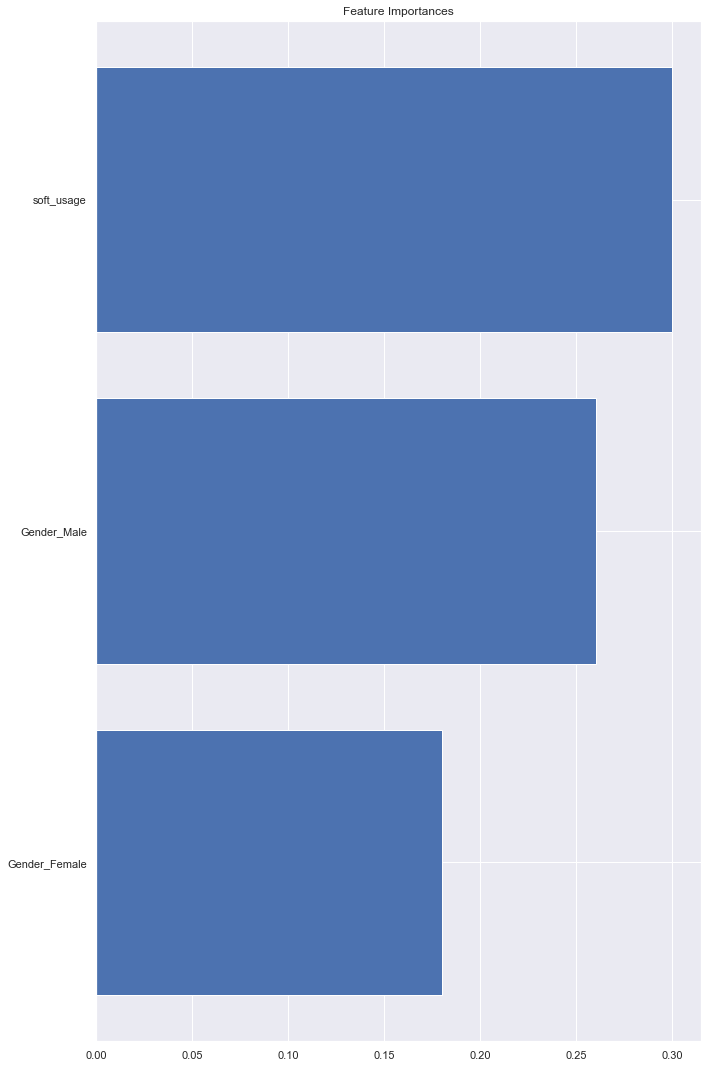


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       651
           1       0.74      0.91      0.81       762

    accuracy                           0.78      1413
   macro avg       0.80      0.76      0.77      1413
weighted avg       0.79      0.78      0.77      1413


Results on test data:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       202
           1       0.77      0.91      0.83       270

    accuracy                           0.79       472
   macro avg       0.80      0.77      0.77       472
weighted avg       0.80      0.79      0.78       472




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


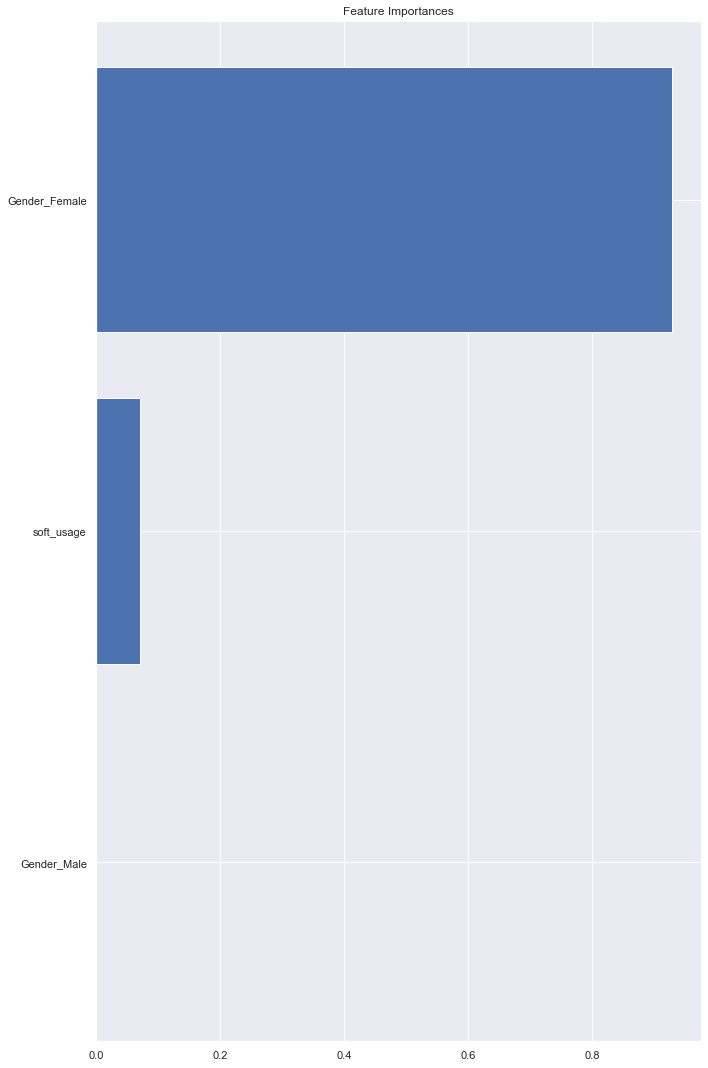

In [73]:
# create preprocessors
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])

# defining the models
models = [
    RandomForestClassifier, 
    XGBClassifier,
    KNeighborsClassifier,
    SVC,
    LogisticRegression,
    AdaBoostClassifier,
    DecisionTreeClassifier,
]

# process pipeline for every model

for model in models:
    print('\n'+str(model))
    pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', model())
                           ])
    
    
    # fit model
    pipe.fit(X_train, y_train)  

    
    #predict results
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    y_test_pred = pipe.predict(X_test)
    
    # print results

    print("\nResults on training data: ")
    print(classification_report(y_train, y_train_pred))
    print("\nResults on test data:")
    print(classification_report(y_test, y_test_pred))
    print()
    
    
    # feature importance
    try:
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['onehot'])
        feature_names = ohe.get_feature_names(input_features=categoric_features)
        feature_names = np.r_[feature_names, numeric_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')
    
    
    
    

## Target: Hard drug usage based on "soft drug usage" 

In [60]:
# selecting the features and target (all general and psychometrics)
X = df.soft_usage
y = df.hard_usage

categoric_features = list(X.name)
categoric_features


# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [61]:
# create preprocessors
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])

# defining the models
models = [
    RandomForestClassifier, 
    XGBClassifier,
    KNeighborsClassifier,
    SVC,
    LogisticRegression,
    AdaBoostClassifier,
    DecisionTreeClassifier,
]

# process pipeline for every model

for model in models:
    print('\n'+str(model))
    pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', model())
                           ])
    
    
    # fit model
    pipe.fit(X_train, y_train)  

    
    #predict results
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    y_test_pred = pipe.predict(X_test)
    
    # print results

    print("\nResults on training data: ")
    print(classification_report(y_train, y_train_pred))
    print("\nResults on test data:")
    print(classification_report(y_test, y_test_pred))
    print()
    
    
    # feature importance
    try:
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['onehot'])
        feature_names = ohe.get_feature_names(input_features=categoric_features)
        feature_names = np.r_[feature_names, numeric_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')
    
    
    
    

NameError: name 'numeric_features' is not defined

### Soft drug usage 

In [76]:
# selecting the features and target (all general and psychometrics)
X = df.iloc[:, :12]
y = df.soft_usage

categoric_features = list(X.columns[X.dtypes==object])
categoric_features

numeric_features = list(X.columns[X.dtypes != object])
numeric_features

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
# defining the models
models = [
    RandomForestClassifier, 
    XGBClassifier,
    KNeighborsClassifier,
    SVC,
    LogisticRegression,
    AdaBoostClassifier,
    DecisionTreeClassifier,
]

# process pipeline for every model

for model in models:
    print('\n'+str(model))
    pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', model())
                           ])
    
    
    # fit model
    pipe.fit(X_train, y_train)  

    
    #predict results
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    y_test_pred = pipe.predict(X_test)
    
    # print results

    print("\nResults on training data: ")
    print(classification_report(y_train, y_train_pred))
    print("\nResults on test data:")
    print(classification_report(y_test, y_test_pred))
    print()
    
    
    # feature importance
    try:
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['onehot'])
        feature_names = ohe.get_feature_names(input_features=categoric_features)
        feature_names = np.r_[feature_names, numeric_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')
    
    
    
    


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


ValueError: A given column is not a column of the dataframe

# Prediction modeling 

## Preprocessing 

In [112]:
# selecting the features and target (all general and psychometrics)
X = df.iloc[:, 5:12]
y = df.hard_usage

In [113]:
X = pd.get_dummies(X)

In [114]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Detailed Models

### K-Nearest-Neighbours

In [115]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [116]:
y_pred = knn.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       202
           1       0.76      0.67      0.71       270

    accuracy                           0.69       472
   macro avg       0.69      0.69      0.69       472
weighted avg       0.70      0.69      0.69       472



### Random Forest

#### Baseline Random Forest

In [118]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [119]:
y_pred = rfc.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       202
           1       0.76      0.68      0.72       270

    accuracy                           0.69       472
   macro avg       0.69      0.69      0.69       472
weighted avg       0.70      0.69      0.69       472



#### Optimized Random Forest 

In [121]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [131]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 200, max_depth=6, criterion='gini')

In [132]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [133]:
best_pred=rfc1.predict(X_test)

In [134]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       202
           1       0.76      0.78      0.77       270

    accuracy                           0.73       472
   macro avg       0.73      0.72      0.72       472
weighted avg       0.73      0.73      0.73       472



In [135]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_pred, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_pred)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_pred, beta = 0.5)))
print(rfc1)

Unoptimized model
------
Accuracy score on testing data: 0.7564
F-score on testing data: 0.7856

Optimized Model
------
Final accuracy score on the testing data: 0.7309
Final F-score on the testing data: 0.7620
RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)


### SVM 

#### Baseline SVM 

In [136]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train) 

SVC()

In [137]:
y_pred = svm.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       202
           1       0.78      0.79      0.79       270

    accuracy                           0.76       472
   macro avg       0.75      0.75      0.75       472
weighted avg       0.76      0.76      0.76       472



#### Optimized SVM 

In [139]:
num_features = np.size(X_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [140]:
clf_svm = SVC(random_state=42, C=100, gamma=0.0001)
clf_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.0001, random_state=42)

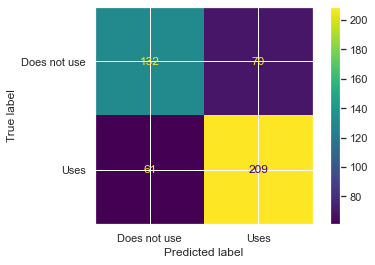

In [141]:
plot_confusion_matrix(clf_svm, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Does not use", "Uses"]);

In [142]:
y_pred = clf_svm.predict(X_test)

In [143]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7215706894671868

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.722457627118644

### XGBoost 

#### Baseline XGBoost 

In [145]:
# instanciate classifier, fit model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [146]:
y_pred = xgb.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       202
           1       0.76      0.76      0.76       270

    accuracy                           0.72       472
   macro avg       0.71      0.71      0.71       472
weighted avg       0.72      0.72      0.72       472



#### Optimized XGBoost 

In [152]:
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],
     'learning_rate': [0.1, 0.01, 0.05, 0.5, 1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0, 10.0, 20, 100,],
     'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
 }

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', 
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'reg_lambda': 20, 'scale_pos_weight': 5}


In [153]:
clf_xgb = XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0,
                        learn_rate=0.5,
                        max_depth=6,
                        reg_lambda=100,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.729137
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.789826
[2]	validation_0-aucpr:0.796667
[3]	validation_0-aucpr:0.834769
[4]	validation_0-aucpr:0.830744
[5]	validation_0-aucpr:0.840678
[6]	validation_0-aucpr:0.833803
[7]	validation_0-aucpr:0.836026
[8]	validation_0-aucpr:0.838412
[9]	validation_0-aucpr:0.835383
[10]	validation_0-aucpr:0.840009
[11]	validation_0-aucpr:0.838883
[12]	validation_0-aucpr:0.83892
[13]	validation_0-aucpr:0.840096
[14]	validation_0-aucpr:0.843889
[15]	validation_0-aucpr:0.845148
[16]	validation_0-aucpr:0.846645
[17]	validation_0-aucpr:0.846695
[18]	validation_0-aucpr:0.847256
[19]	validation_0-aucpr:0.847543
[20]	validation_0-aucpr:0.84637
[21]	validation_0-aucpr:0.847081
[22]	validation_0-aucpr:0.84457
[23]	validation_0-aucpr:0.845197
[24]	validation_0-aucpr:0.844149
[25]	validation_0-aucpr:0.846633
[26]	validation_0-aucpr:0.847262
[27]	validation_0-aucpr:0.846332
[28]	validation_0-aucpr

XGBClassifier(colsample_bytree=0.5, learn_rate=0.5, max_depth=6, reg_lambda=100,
              seed=42, subsample=0.9)

In [154]:
y_pred = clf_xgb.predict(X_test)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       202
           1       0.76      0.79      0.78       270

    accuracy                           0.74       472
   macro avg       0.73      0.73      0.73       472
weighted avg       0.74      0.74      0.74       472



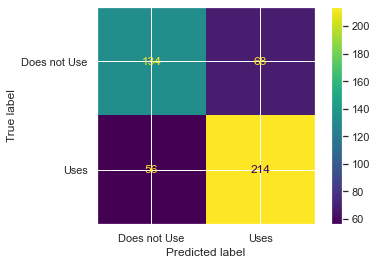

In [156]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=["Does not Use", "Uses"])

### Adaboost

#### Baseline Adaboost 

In [157]:
ada = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
ada.fit(X_train, y_train)

# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

AdaBoostClassifier()

In [158]:
y_pred = ada.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       202
           1       0.77      0.77      0.77       270

    accuracy                           0.74       472
   macro avg       0.74      0.74      0.74       472
weighted avg       0.74      0.74      0.74       472



#### Optimized Adaboost

In [163]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

# TODO: Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) 

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[1000],                
              'learning_rate':[0.1, 0.5, 1,],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6377
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.7394
Final F-score on the testing data: 0.7744
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=1000)


### Logistics Regression 

In [164]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [165]:
y_pred=lr.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       202
           1       0.76      0.80      0.78       270

    accuracy                           0.74       472
   macro avg       0.73      0.73      0.73       472
weighted avg       0.74      0.74      0.74       472



### Decision Tree 

#### Baseline Decision Tree 

In [167]:
tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

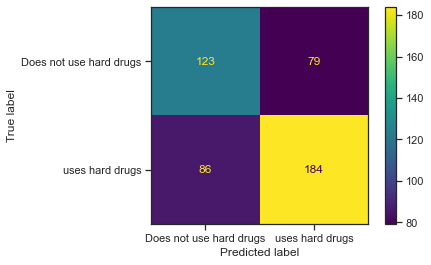

In [168]:
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Does not use hard drugs', 'uses hard drugs']);

In [169]:
print(f'Decision tree has { tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 647 nodes with maximum depth 20.


In [170]:
y_pred = tree.predict(X_test)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       202
           1       0.70      0.68      0.69       270

    accuracy                           0.65       472
   macro avg       0.64      0.65      0.64       472
weighted avg       0.65      0.65      0.65       472



#### Optimized Decision Tree 

In [ ]:
path = tree.cost_complexity_pruning_path(X_train, y_train) # determin values fo aplha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

#now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(tree)

In [173]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

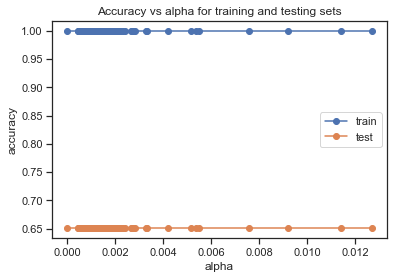

In [174]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

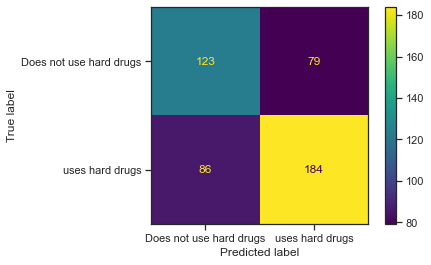

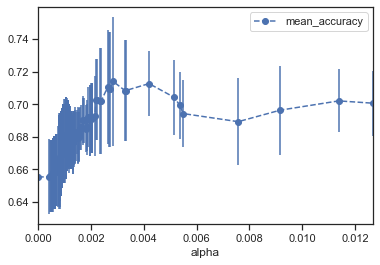

In [175]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores= cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

Alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Does not use hard drugs', 'uses hard drugs']);
Alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o',linestyle='--');

In [188]:
Ideal_ccp_alpha= Alpha_results[(Alpha_results['alpha'] >0.0025) & (Alpha_results['alpha'] <0.0035)]

In [189]:
Ideal_ccp_alpha.head(5)

alpha  mean_accuracy       std
132  0.002636       0.710500  0.034878
133  0.002699       0.709087  0.035145
134  0.002734       0.709087  0.035145
135  0.002831       0.714037  0.039658
136  0.003285       0.708398  0.030811

In [190]:
Clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.002831)
Clf_dt_pruned = Clf_dt_pruned.fit(X_train, y_train)

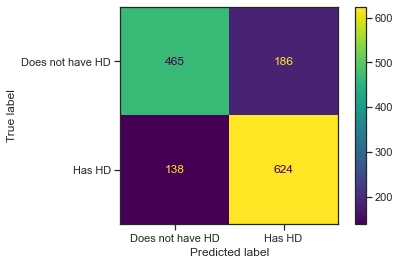

In [191]:
plot_confusion_matrix(Clf_dt_pruned, X_train, y_train, display_labels=['Does not have HD', 'Has HD'])

In [192]:
y_pred = Clf_dt_pruned.predict(X_test)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       202
           1       0.75      0.80      0.78       270

    accuracy                           0.73       472
   macro avg       0.73      0.72      0.72       472
weighted avg       0.73      0.73      0.73       472



### Stacking Classifier

In [194]:
estimators = [('rf', RandomForestClassifier(n_estimators=200, random_state=42)), 
              ('svr', make_pipeline(StandardScaler(), SVC(random_state=42))),
              ('lr', LogisticRegression(max_iter=1000))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(random_state=42))])),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

In [195]:
y_pred = clf.predict(X_test)

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       202
           1       0.75      0.77      0.76       270

    accuracy                           0.73       472
   macro avg       0.72      0.72      0.72       472
weighted avg       0.73      0.73      0.73       472



### Overall comparison of classifiers 

In [212]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [213]:
# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = SVC(random_state=101)
clf_B = LogisticRegression(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

SVC trained on 14 samples.
SVC trained on 141 samples.
SVC trained on 1413 samples.
LogisticRegression trained on 14 samples.
LogisticRegression trained on 141 samples.
LogisticRegression trained on 1413 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

AdaBoostClassifier trained on 14 samples.
AdaBoostClassifier trained on 141 samples.
AdaBoostClassifier trained on 1413 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [214]:
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (12,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [215]:
population = len(df)
users = len(df[df['hard_usage'] == 1])
non_users = len(df[df['hard_usage'] == 0])
users_percentage = 100 * users / population

users_percentage

54.748010610079575

In [216]:
# TODO: Calculate accuracy
accuracy = users / population

# Calculating precision
precision = users / (users + non_users)

#Calculating recall
recall = users / (users + 0)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5475, F-score: 0.6020]


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


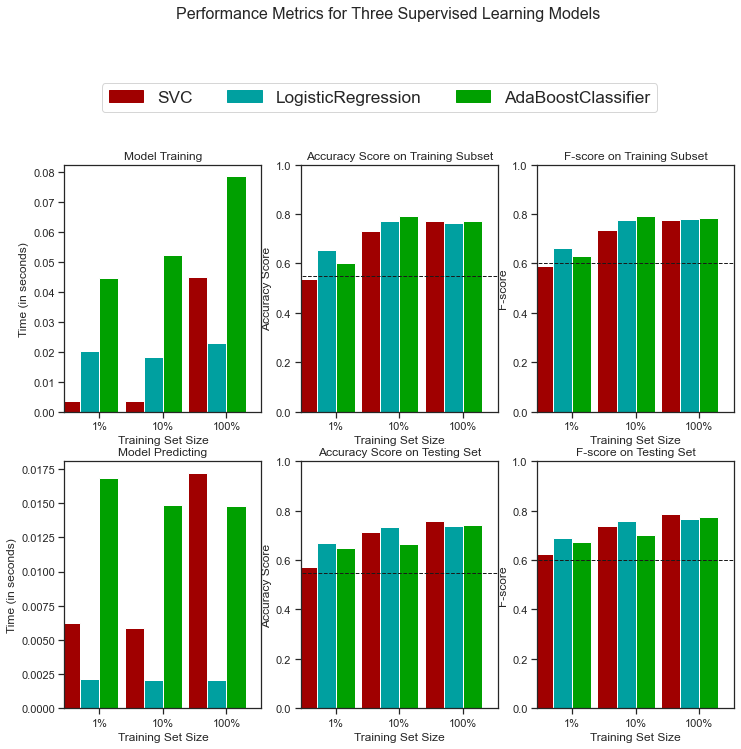

In [217]:
evaluate(results, accuracy, fscore)

In [218]:
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

SVC


1%       10%      100%
acc_test    0.572034  0.713983  0.756356
acc_train   0.536667  0.730000  0.770000
f_test      0.625579  0.739484  0.785609
f_train     0.591477  0.733844  0.775963
pred_time   0.006203  0.005901  0.017208
train_time  0.003689  0.003451  0.044742

LogisticRegression


1%       10%      100%
acc_test    0.669492  0.735169  0.739407
acc_train   0.653333  0.773333  0.763333
f_test      0.689369  0.756445  0.766762
f_train     0.661700  0.775371  0.778739
pred_time   0.002146  0.002032  0.002087
train_time  0.020327  0.018156  0.022821

AdaBoostClassifier


1%       10%      100%
acc_test    0.648305  0.665254  0.741525
acc_train   0.603333  0.793333  0.770000
f_test      0.674646  0.702364  0.774074
f_train     0.628821  0.790960  0.784920
pred_time   0.016858  0.014880  0.014819
train_time  0.044526  0.052359  0.078425

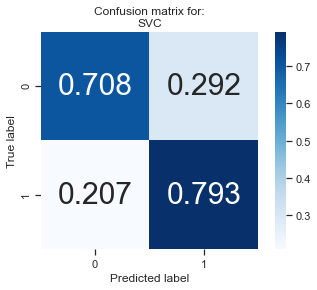

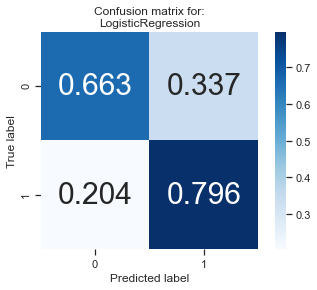

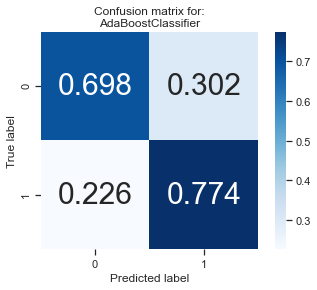

In [219]:
for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

# Playground 

## Niko 

In [205]:
## If we want to get information, like gain and cover etc, at each node in the first tree, 
## we just build the first tree, otherwise we'll get the average over all of the trees.
# clf_xgb = XGBClassifier(seed=0,
#                             objective='binary:logistic',
#                             gamma=0,
#                             learn_rate=0.5,
#                             max_depth=6,
#                             reg_lambda=100,
#                             scale_pos_weight=1,
#                             subsample=0.9,
#                             colsample_bytree=0.5,
#                             n_estimators=1 ## We set this to 1 so we can get gain, cover etc.
#                             )
# clf_xgb.fit(X_train, y_train)

## now print out the weight, gain, cover etc. for the tree
## weight = number of times a feature is used in a branch or root across all trees
## gain = the average gain across all splits that the feature is used in
## cover = the average coverage across all splits a feature is used in
## total_gain = the total gain across all splits the feature is used in
## total_cover = the total coverage across all splits the feature is used in
## NOTE: Since we only built one tree, gain = total_gain and cover=total_cover
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box', ## make the nodes fancy
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'} 
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}
## NOTE: num_trees is NOT the number of trees to plot, but the specific tree you want to plot
## The default value is 0, but I'm setting it just to show it in action since it is
## counter-intuitive.
# xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", 
#                 condition_node_params=node_params,
#                 leaf_node_params=leaf_params)
# ## if you want to save the figure...
# graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", 
#                  condition_node_params=node_params,
#                  leaf_node_params=leaf_params) 
# graph_data.view(filename='xgboost_tree_credit_card') ## save as PDFfrom IPython.display import display

weight:  {'Oscore': 109, 'Cscore': 87, 'Ascore': 103, 'Impulsive': 41, 'Nscore': 112, 'SS': 25, 'Escore': 44}
gain:  {'Oscore': 5.171715093128642, 'Cscore': 3.667788468504941, 'Ascore': 0.7149696363063184, 'Impulsive': 4.39447500167439, 'Nscore': 0.9801867128202144, 'SS': 19.97067093649, 'Escore': 0.7933529650903821}
cover:  {'Oscore': 69.8323256211009, 'Cscore': 81.07456355137933, 'Ascore': 56.78328936194175, 'Impulsive': 86.29281692902437, 'Nscore': 47.099877814285705, 'SS': 109.10877102080002, 'Escore': 55.51612346795455}
total_gain:  {'Oscore': 563.7169451510221, 'Cscore': 319.09759675992984, 'Ascore': 73.64187253955079, 'Impulsive': 180.17347506865002, 'Nscore': 109.78091183586402, 'SS': 499.26677341224996, 'Escore': 34.90753046397681}
total_cover:  {'Oscore': 7611.723492699999, 'Cscore': 7053.487028970001, 'Ascore': 5848.67880428, 'Impulsive': 3538.005494089999, 'Nscore': 5275.186315199999, 'SS': 2727.7192755200003, 'Escore': 2442.7094325900002}


In [206]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [207]:
# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = RandomForestClassifier(random_state=101)
clf_B = LogisticRegression(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 14 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RandomForestClassifier trained on 141 samples.
RandomForestClassifier trained on 1413 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anac

LogisticRegression trained on 14 samples.
LogisticRegression trained on 141 samples.
LogisticRegression trained on 1413 samples.
AdaBoostClassifier trained on 14 samples.
AdaBoostClassifier trained on 141 samples.
AdaBoostClassifier trained on 1413 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [208]:
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (12,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [209]:
clf_svm = SVC(random_state=42, C=100, gamma=0.0001)
clf_svfrom IPython.display import display

from sklearn.metrics import fbeta_score, accuracy_score
from time import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = RandomForestClassifier(random_state=101)
clf_B = LogisticRegression(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (12,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()m.fit(pca_train, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_test)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
####cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("non_user")
legend.get_texts()[1].set_text("user")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
## plt.savefig('svm.png')
plt.show()

SyntaxError: invalid syntax (<ipython-input-209-3accd80f06fb>, line 2)

## David

In [ ]:
# NOT IN USE SO FAR

# param_grid = {'n_estimators':[5,10,11,12,13,14,20,30,50,70,100]}
# randf_ = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(randf_,param_grid
#               KNeighborsClassifier     , cv=5, scoring='accuracy')

In [210]:
# DAVID: WORK IN PROGRESS
Xc = X.copy()
y = y.copy()

Xc = preprocessor(Xc)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
n_estimator = 10



X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)


# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

TypeError: 'ColumnTransformer' object is not callable

In [211]:
# DAVID: WORK IN PROGRESS!


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

NameError: name 'PCA' is not defined

In [ ]:
# DAVID: WORK IN PROGRESS
Xc = X.copy()
y = y.copy()

Xc = preprocessor(Xc)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
n_estimator = 10



X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)


# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# DAVID: WORK IN PROGRESS!


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))